<a href="https://colab.research.google.com/github/JulienChoukroun/Detection-de-fraude-de-carte-bancaire/blob/main/Projet_Data_Valorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
# **<center>Projet Valorisation de données <center>** 
# **<center> Détection de fraude de carte de bancaire </center>**
<center>CHOUKROUN Julien - GOURDON Jessica - SAGNES Luc - ADANLEHOUSSI Komi Denis</center>


---

# Première partie

## But et objectif technique

Le but de ce projet est de reconnaître et détecter les fraudes de cartes bancaires.

L’objectif technique est la réalisation d’une classification déséquilibrée. 

La classification est une famille d'algorithmes de machine learning supervisés qui identifient à quelle catégorie appartient un objet (par exemple si une transaction est une fraude ou non), sur la base d'exemples étiquetés d'objets connus (par exemple des transactions connues pour être des fraudes ou non). La classification prend un ensemble de données avec des étiquettes connues et des caractéristiques prédéterminées et apprend à étiqueter de nouveaux enregistrements sur la base de ces informations. 

Dans notre cas, la classification déséquilibrée est un problème de classification dans lequel une classe est sous-représentée par rapport aux autres. Le cas classique est un problème à deux classes, une majoritaire à 99% et une minoritaire à 1%.


In [ ]:
# Chargement des librairies
install.packages('data.table')
library(data.table)
install.packages('ggplot2')
library(ggplot2)
install.packages('plyr')
library(plyr)
install.packages('dplyr')
library(dplyr)
install.packages('corrplot')
library(corrplot)
install.packages('Rtsne')
library(Rtsne)
install.packages('caret')
library(caret)
install.packages('e1071', dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:ggplot2’:

    vars


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.88 loaded

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is 

In [ ]:
install.packages("googledrive")
library("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Check if is running in Colab and redefine is_interactive()
install.packages("R.utils")
library("R.utils")
library("httr")
my_check <- function() {return(TRUE)}
reassignInPackage("is_interactive", pkgName = "httr", my_check) 
options(rlang_interactive=TRUE)

# call authentication forcing interactive login and save in cache. 
drive_auth(use_oob = TRUE, cache = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.10.1 (2020-08-26 22:50:31 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings



Attaching 

Enter authorization code: 4/1AY0e-g5sI_X05K0Y82OlRtCH_VMx5d-XhqDtGrf1buqnS-moYBJfnR_-FIA


In [ ]:
drive_download("/Kaggle/creditcard.csv")

File downloaded:
  * creditcard.csv
Saved locally as:
  * creditcard.csv



## Description des données

Notre base de données contient des données sur des transactions effectuées en septembre 2013 par des cartes bancaires européennes. Cette base de données présente des transactions effectuées pendant 2 jours  où il y a eu 492 fraudes sur 284 807. Il y a donc très peu de fraudes sur cette base de données. (0.172%)


In [ ]:
# Chargement des données
data <- fread("/content/creditcard.csv")

Il y a dans cette base de données 31 variables dont 28 provenant d’une transformation PCA (analyse en composantes principales) car malheureusement les caractéristiques premières contiennent des données confidentielles qui ne peuvent pas être fournies. Ces variables sont les colonnes V1, V2, ..., jusqu’à V28. Ces données sont par exemple le numéro de compte, les adresses de domicile, les dates d’expiration de cartes bleues, etc, ...

Les seules données qui n’ont pas été transformées sont les colonnes 'Time', 'Amount' et 'Class'. 

'Time' contient le temps écoulé entre chaque transaction et la première transaction de la base de données. 

'Amount' quant à lui contient les montants des transactions et cette caractéristique peut être utile pour reconnaître la sensibilité et l’importance des coûts des transactions.

Enfin, 'Class' est la dernière variable qui vaut 1 si la transaction est une fraude et 0 sinon.


In [ ]:
# Affiche les 5 premières lignes du dataset
head(data)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [ ]:
# Quelques statistiques pour chaque variables : 
# valeur minimale, premier quartile, médiane, moyenne, troisième quartile, valeur maximale
summary(data)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139320   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

## Pré-traitement des données

Dans le but de nous assurer de la fiabilité de nos données, nous avons effectué un pré-traitement de ces dernières. 

Nous nous sommes assuré qu’il n’existe pas d’entrées avec  des données manquantes à certains endroits. Nous allons donc chercher des valeurs dites ‘NA’. Pour cela, nous calculons pour chaque colonne la somme cumulée de ces NA. On observe que le résultat est nul pour toutes les colonnes. 

Il n’y a donc pas de données manquantes dans notre base de données. Toutes nos entrées sont donc utiles pour entamer l’analyse statistique.


In [ ]:
# Calcul pour chaque colonne de la somme cumulée de NA
apply(data, 2, function(x) sum(is.na(x)))

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9    V10 
     0      0      0      0      0      0      0      0      0      0      0 
   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21 
     0      0      0      0      0      0      0      0      0      0      0 
   V22    V23    V24    V25    V26    V27    V28 Amount  Class 
     0      0      0      0      0      0      0      0      0

## Analyse statistique des données

Pour commencer, nous avons réalisé un bar plot du nombre de transactions par classe, c’est-à-dire, le nombre de transactions non frauduleuses et le nombre de transactions frauduleuses. 

On observe que l'ensemble des données est extrêmement déséquilibré. En effet, nous savons que sur 284 807 transactions, il n'y a que 492 fraudes. D’un point de vue statistique, dans ce cas de figure, des calculs de moyenne des données ne seraient pas représentatifs en raison du trop grand déséquilibre entre les classes.

Par ailleurs, ce déséquilibre augmente nettement la difficulté de l’apprentissage par l’algorithme de classification étant donné qu’on a que très peu d’exemples concernant la classe minoritaire. Il produit des prédictions potentiellement moins robustes en l’absence de déséquilibre. 


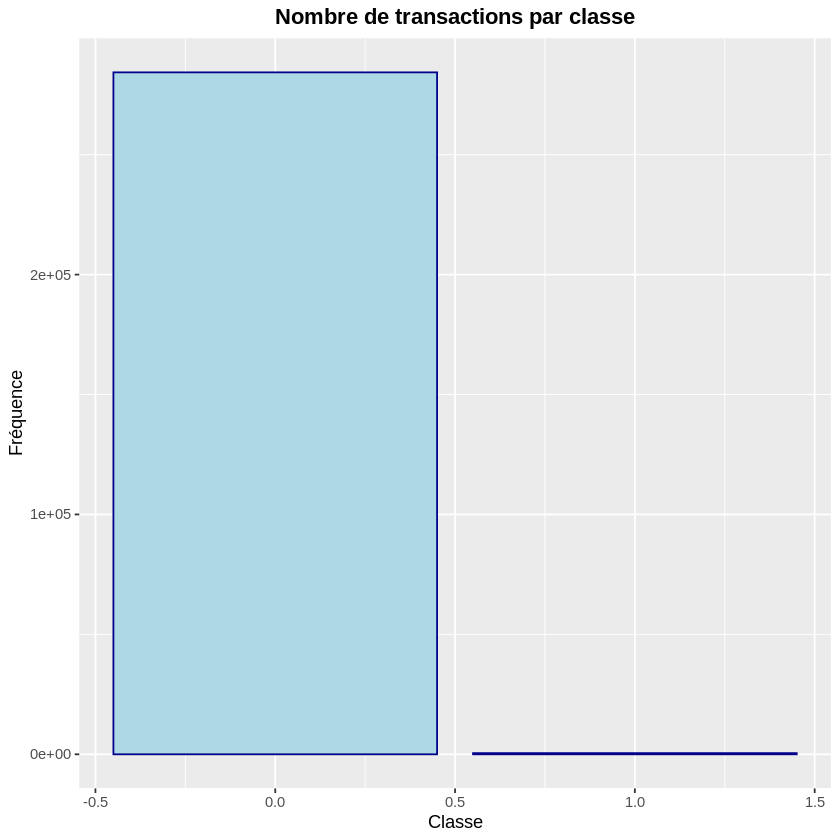

In [ ]:
# Pour mettre le titre au centre et en gras
theme_commun <- theme(plot.title = element_text(hjust = 0.5, face = "bold"))

# Bar plot du nombre de transactions par classe
p <- ggplot(data, aes(x = Class)) + geom_bar(color="darkblue", fill="lightblue") + ggtitle("Nombre de transactions par classe") + xlab("Classe") + ylab("Fréquence") + theme_commun
print(p)

Ensuite, nous avons affiché la distribution des montants des transactions par classe.


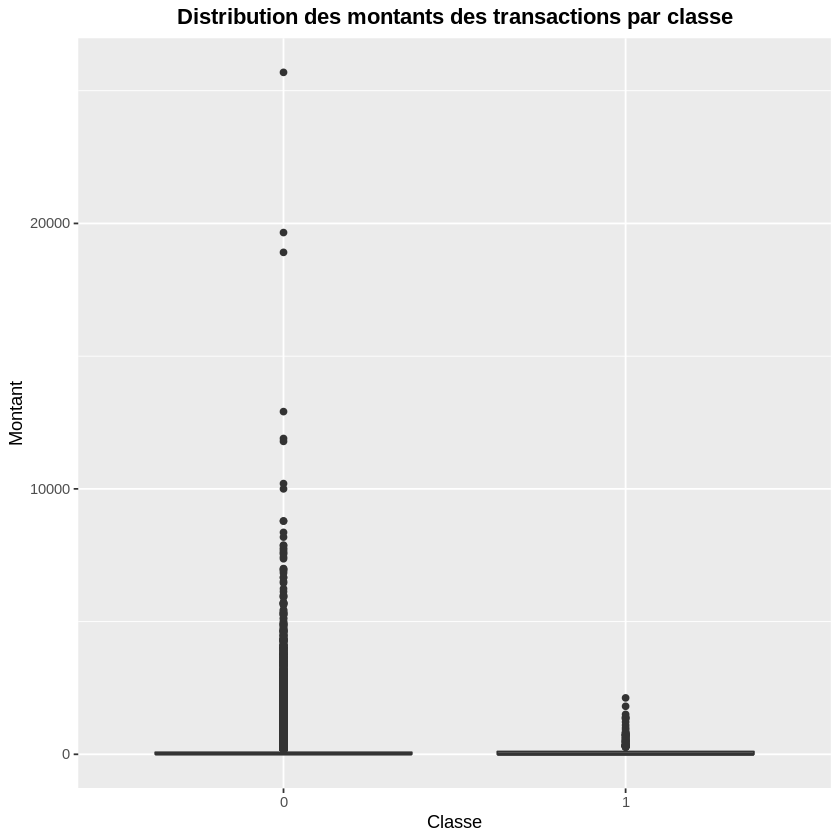

In [ ]:
# Box plot des montants des transactions par classe
p <- ggplot(data, aes(x = as.character(Class), y = Amount)) + geom_boxplot() + ggtitle("Distribution des montants des transactions par classe") + xlab("Classe") + ylab("Montant") + theme_commun
print(p)

Nous avons aussi calculé les valeurs moyennes et médianes de ces montants pour chaque type de transaction. 

On observe que les transactions frauduleuses semblent avoir une valeur moyenne plus élevée que les transactions non frauduleuses, cette caractéristique serait probablement intéressante à utiliser dans le modèle prédictif. 

In [ ]:
# Affiche la moyenne, la médiane et l'écart-type pour chaque classe
data %>% group_by(Class) %>% summarise(mean(Amount), median(Amount), sd(Amount))

Class,mean(Amount),median(Amount),sd(Amount)
<dbl>,<dbl>,<dbl>,<dbl>
0,88.29102,22.00,250.1051
1,122.21132,9.25,256.6833


On a pu observer que les valeurs des transactions non frauduleuses étaient beaucoup plus étendues. Et, il y avait une asymétrie positive. 

La distribution est décalée à gauche de la médiane. On peut observer que 80% des montants sont compris entre 0 et 100 euros. Cela s’explique par le fait qu’une personne, au quotidien, sera certes amenée à faire de grosses dépenses de plusieurs milliers d’euros mais la plupart seront des dépenses relativement faibles. La moyenne qui est à 80 euros sera donc plus élevée que la médiane qui est à 22 euros pour cette classe.

Concernant les transactions frauduleuses, la médiane est plus faible et les valeurs sont bien moins étendues. En effet, lors d’une opération frauduleuse, pour éviter au maximum les suspicions, les montants ne doivent pas être trop élevés. Il sera plus intéressant, dans ce cadre, de réaliser plusieurs petites transactions frauduleuses donc ayant un faible montant plutôt qu’une grande transaction qui ne passera pas inaperçue. Cela expliquerait la faible valeur de la médiane pour ces données.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



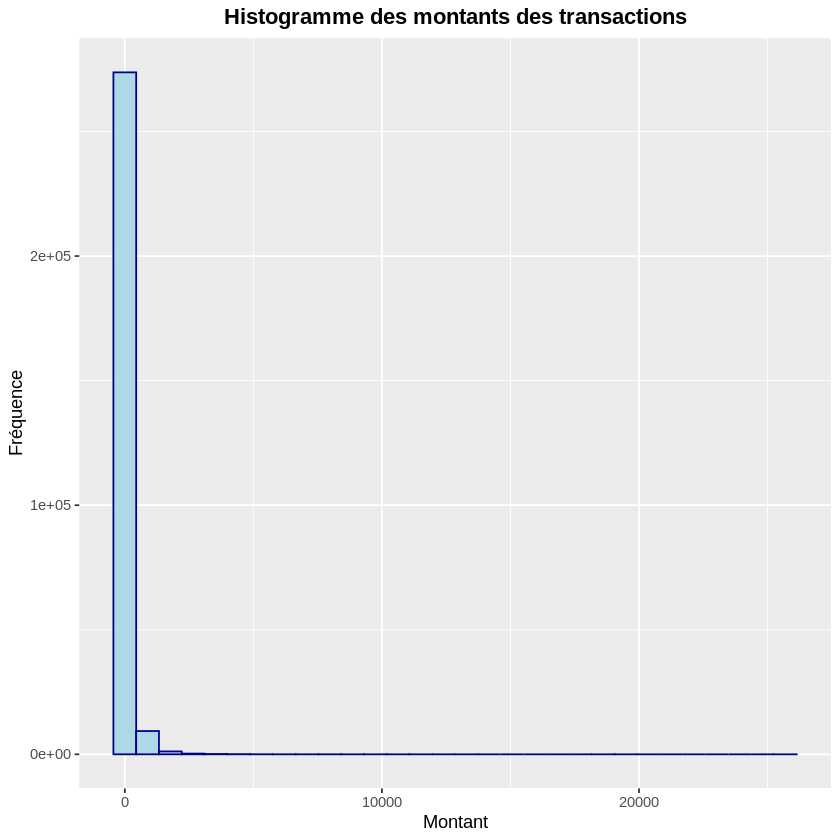

In [ ]:
# Histogramme des montants des transactions
p <- ggplot(data, aes(x = Amount)) + geom_histogram(color="darkblue", fill="lightblue") + ggtitle("Histogramme des montants des transactions") + xlab("Montant") + ylab("Fréquence") + theme_commun
print(p)

In [ ]:
# Calcul des quartiles
x <- seq(0, 1, 0.1)
q <- quantile(data$Amount, prob=x)
print(q)

      0%      10%      20%      30%      40%      50%      60%      70% 
    0.00     1.00     3.57     8.91    13.00    22.00    37.00    59.80 
     80%      90%     100% 
  100.00   203.00 25691.16 


On a ensuite voulu observer la densité des transactions au cours d’une journée. 

On constate que les transactions légitimes s’effectuent pour la plupart entre 8h et 21h ce qui est plutôt normal puisque c’est durant cette période de la journée que les gens sont globalement éveillés. Cependant, on constate un pic à 3h pour les transactions frauduleuses avec une densité supérieure à celle des transactions normales. 

Il sera donc intéressant de faire plus attention aux transactions effectuées à des horaires inhabituels.


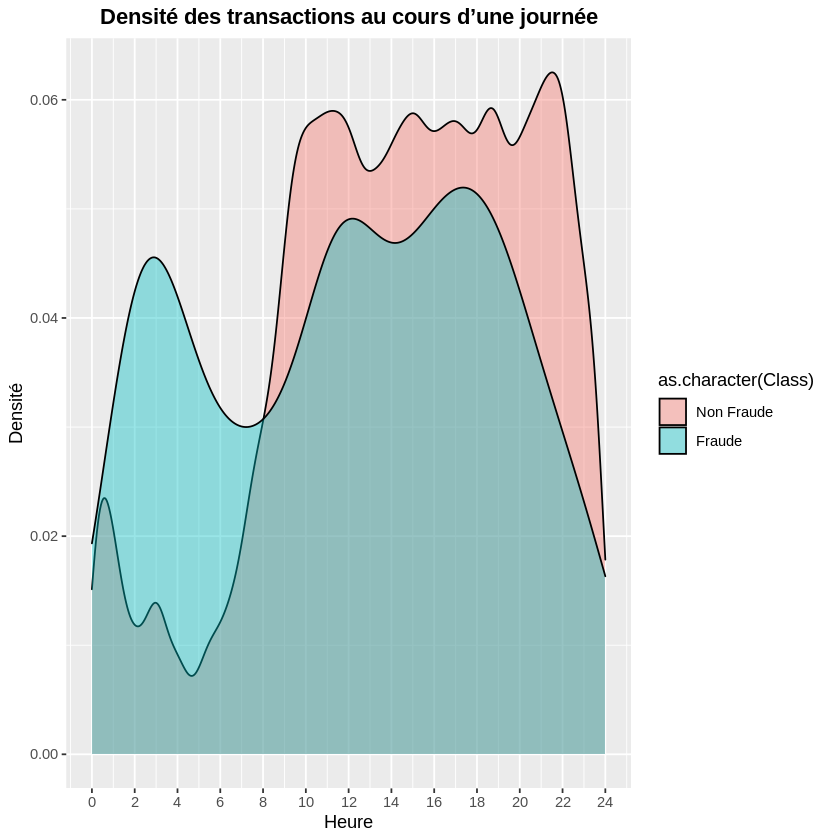

In [ ]:
# Convertit en heures et réduit à modulo 24
heure <- (data$Time/3600) %% 24
# Densité des transactions au cours d’une journée
ggplot(data, aes(x = heure, fill = as.character(Class))) +
  geom_density(alpha = 0.4) + 
  scale_x_continuous(limits = c(0, 24), breaks = seq(0, 24, 2)) + 
  labs(title = "Densité des transactions au cours d’une journée", x = "Heure", y = "Densité", col = "Classe") + 
  theme_commun +
  scale_fill_discrete(labels = c("Non Fraude", "Fraude"))

Etant donné que les variables de notre base de données sont anonymisées nous avons voulu voir s’il existe une corrélation entre elles.

Pour rappel, deux variables sont corrélés entre elles si leur coefficient de corrélation se rapproche de 1 en valeur absolue.

La matrice de corrélation nous montre qu'il n'y a donc aucune corrélation entre les variables V1 à V28 entre elles ce qui est normal puisque ces variables proviennent d’une PCA et les composantes principales sont donc décorrélées.

Cependant, il existe des corrélations entre les variables 'Amount' et 'Class' avec des variables V qui sont encourageantes et qui pourront nous permettre peut-être de faciliter la classification plus tard pour deviner si une transaction est frauduleuse ou non.

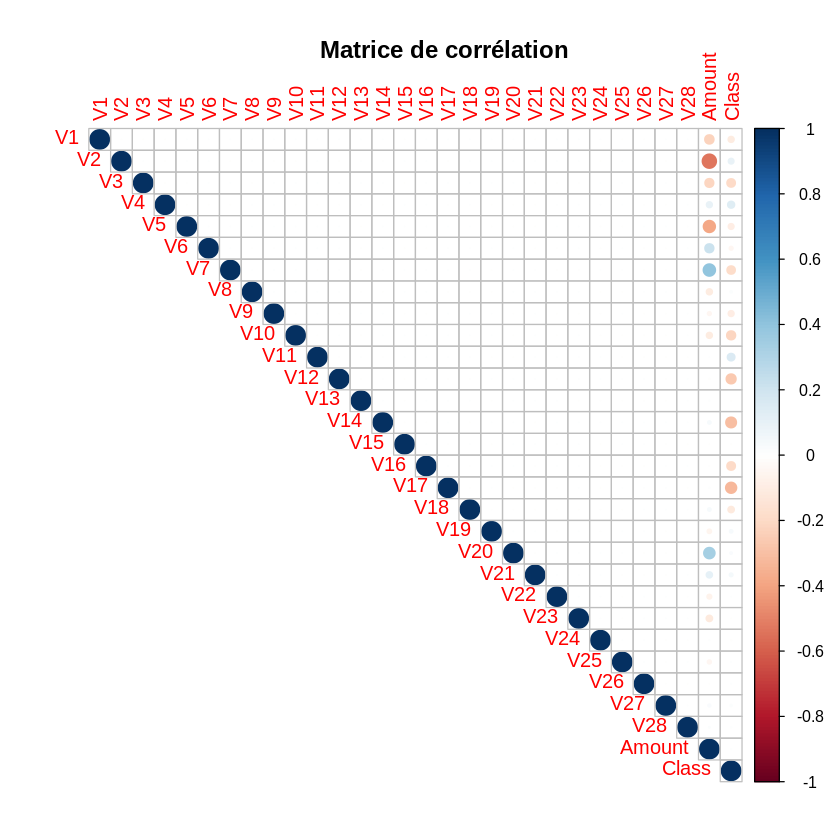

In [ ]:
# Matrice de corrélation
data$Class <- as.numeric(data$Class)
corr_plot <- corrplot(cor(data[,-c("Time")]), method = "circle", type = "upper")
title('Matrice de corrélation')

Pour essayer de mieux comprendre les données, nous avons essayé de les visualiser à l'aide de l’algorithme t-SNE.

L'algorithme t-SNE (t-distributed stochastic neighbor embedding) est une technique de réduction de dimension pour la visualisation de données. Il s'agit d'une méthode non linéaire permettant de représenter un ensemble de points d'un espace à grande dimension dans un espace de deux ou trois dimensions, les données peuvent ensuite être visualisées avec un nuage de points. L'algorithme t-SNE tente de trouver une configuration optimale selon un critère de théorie de l'information pour respecter les proximités entre points : deux points qui sont proches (resp. éloignés) dans l'espace d'origine devront être proches (resp. éloignés) dans l'espace de faible dimension.

Dans notre cas, il existe une distinction assez claire entre les transactions légitimes et frauduleuses, qui semblent se regrouper dans certaines régions de l’espace, notamment sur les bords de la "goutte" de données. Ceci est une nouvelle encourageante en ce qui concerne nos chances de classification future.


In [ ]:
# On utilise 10% des données pour calculer le t-SNE
tsne_subset <- 1:as.integer(0.1*nrow(data))
tsne <- Rtsne(data[tsne_subset,-c("Class", "Time")], perplexity = 20, theta = 0.5, pca = F, verbose = T, max_iter = 500, check_duplicates = F)

Read the 28480 x 29 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 20.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 28480
 - point 20000 of 28480
Done in 9.85 seconds (sparsity = 0.002966)!
Learning embedding...
Iteration 50: error is 114.730941 (50 iterations in 9.03 seconds)
Iteration 100: error is 114.486388 (50 iterations in 13.34 seconds)
Iteration 150: error is 95.432685 (50 iterations in 9.20 seconds)
Iteration 200: error is 89.266455 (50 iterations in 8.23 seconds)
Iteration 250: error is 86.400465 (50 iterations in 8.15 seconds)
Iteration 300: error is 3.906981 (50 iterations in 7.65 seconds)
Iteration 350: error is 3.485458 (50 iterations in 7.52 seconds)
Iteration 400: error is 3.201568 (50 iterations in 7.57 seconds)
Iteration 450: error is 2.987509 (50 iterations in 7.54 seconds)
Iteration 500: error is 2.817733 (50 iterations in 7.58 seconds)
Fitting performed in 85.81 seconds.


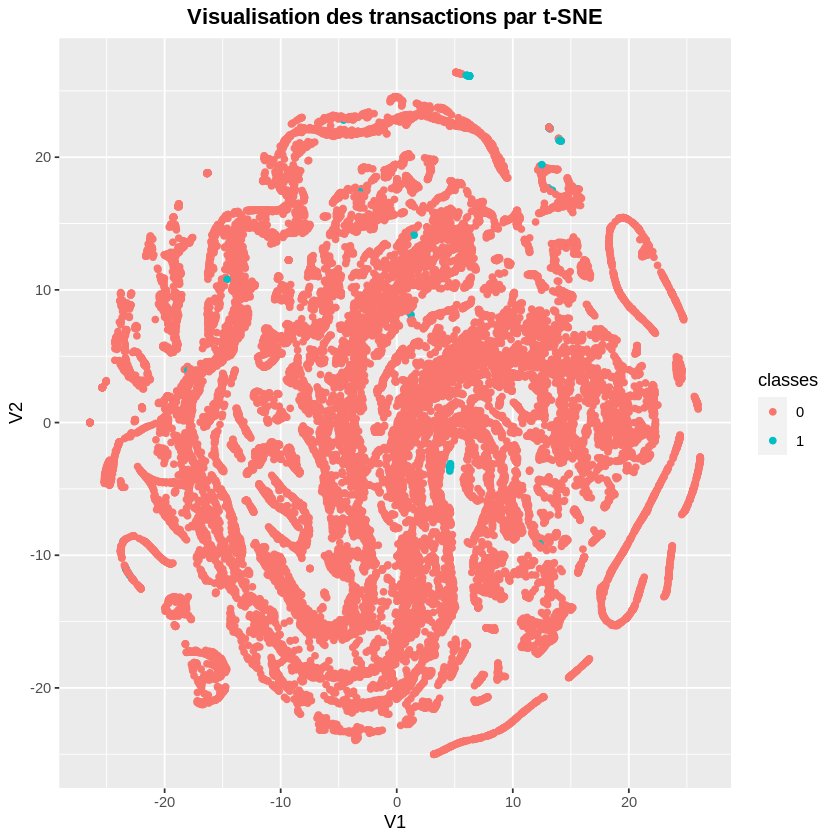

In [ ]:
# Affiche le nuage de points crée par l'algorithme t-SNE
classes <- as.factor(data$Class[tsne_subset])
tsne_mat <- as.data.frame(tsne$Y)
ggplot(tsne_mat, aes(x = V1, y = V2)) + geom_point(aes(color = classes)) + ggtitle("Visualisation des transactions par t-SNE") + theme_commun + scale_fill_discrete(labels = c("Non Fraude", "Fraude"))

## Brève description de la future analyse qui sera détaillée dans le rendu final

On va séparer les données en 2 groupes : un groupe de training et un groupe de test. Puis, on pourra utiliser les algorithmes d’une part de Régression Logistique et d’autre part une Forêt d'arbres décisionnels (c'est-à-dire un ensemble d’Arbres de Décision).

L'algorithme de régression logistique va mesurer la relation entre le "Label" Y et les "Caractéristiques" X en estimant les probabilités à l'aide d'une fonction logistique. Les fonctions logistiques sont des fonctions contenant une exponentielle. Elles peuvent avoir, selon la valeur de leurs paramètres, une forme de S comme on peut le voir sur le schéma du diaporama. Pour cette raison, elles sont souvent appelées sigmoïdes. Le modèle prédit une probabilité qui est utilisée pour prédire la classe de l'étiquette, donc dans notre cas, la probabilité d’une fraude. Nous aurons recours à une régression logistique plutôt qu’à une régression linéaire puisqu’un modèle linéaire ne fournit pas de probabilités comme on le souhaite. Il pourra nous fournir des valeurs en dessous de 0 ou au-dessus de 1. Ici, nous souhaitons un intervalle borné de valeurs. Nous réaliserons donc une régression logistique.


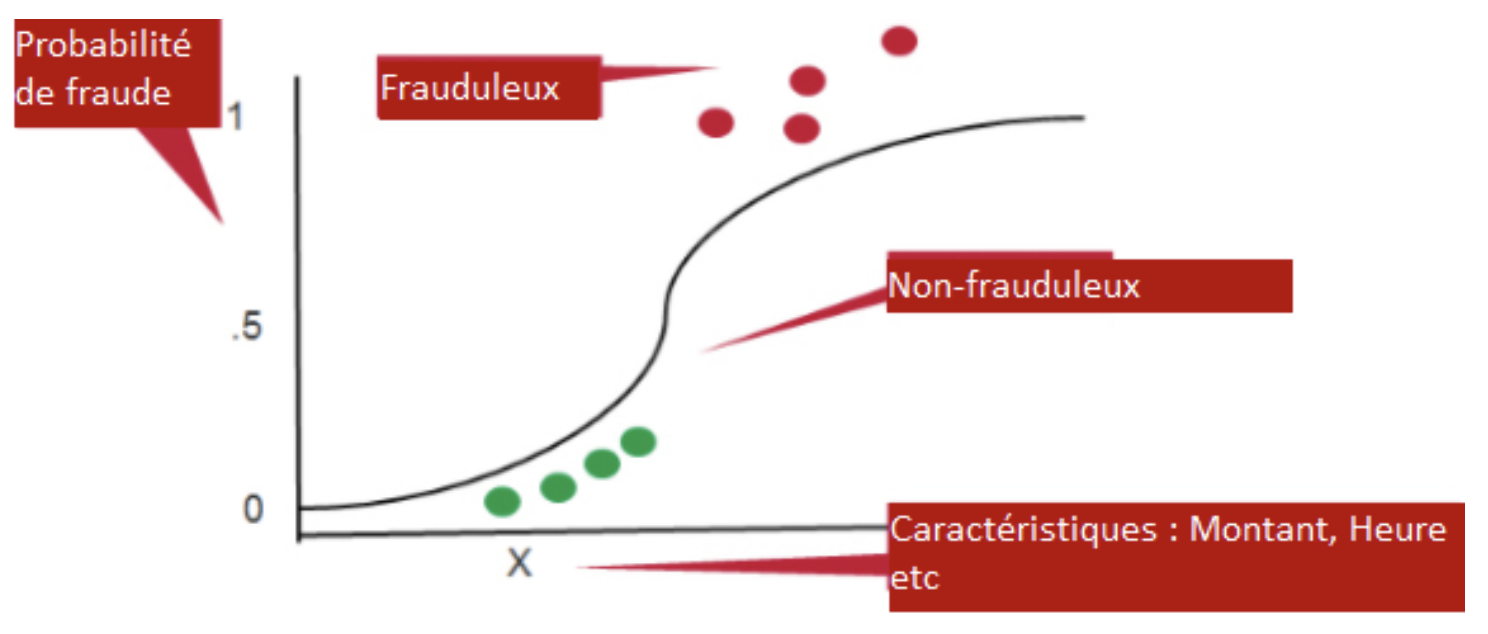

La forêt d’arbres décisionnels (ou ensemble d’arbres de décision) est un algorithme qui construit des arbres de décision pour classer les objets de données.
Les arbres de décision créent un modèle qui prédit la classe ou l'étiquette, en fonction de plusieurs caractéristiques d'entrée. Ils fonctionnent en évaluant une question contenant une caractéristique à chaque nœud et en sélectionnant une branche vers le nœud suivant, en fonction de la réponse. On peut en voir un exemple sur le diaporama, la question “Le montant dépensé en 24 heures est-il > moyenne” amenant à 2 autres questions et ainsi de suite.


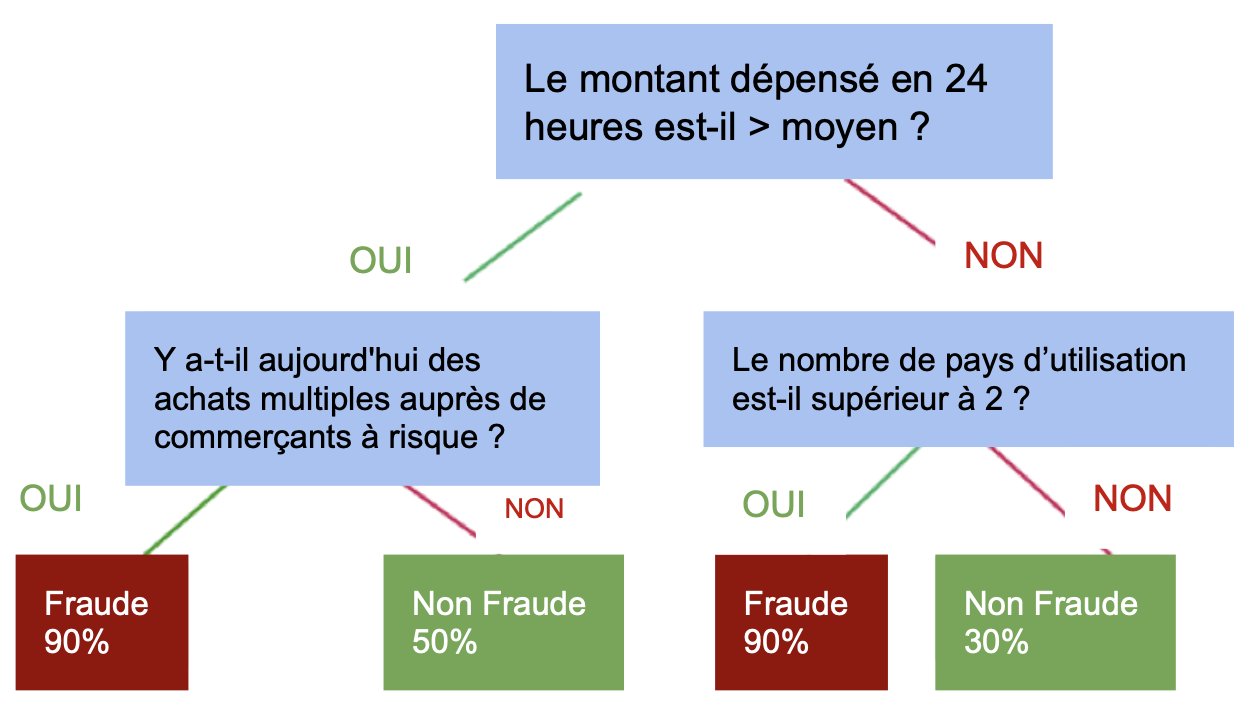

# Deuxième partie

Etant donné que notre base de données est déséquilibrée (grande proportion de données non-frauduleuses et petite de frauduleuses), l'algorithme aura naturellement tendance à classifier les données comme étant non-frauduleuses même si elles sont véritablement frauduleuses. Dans notre étude, on va donc s'intéresser à minimiser le taux de faux négatifs (lorsque l'algorithme prédit la donnée comme étant non-frauduleuse alors qu'elle est frauduleuse).

## **Partie 1 : Extraction des données et division en deux jeux de données : données d'entrainement et de test : Cas où l'on prend autant de transactions non-frauduleuses et frauduleuses**

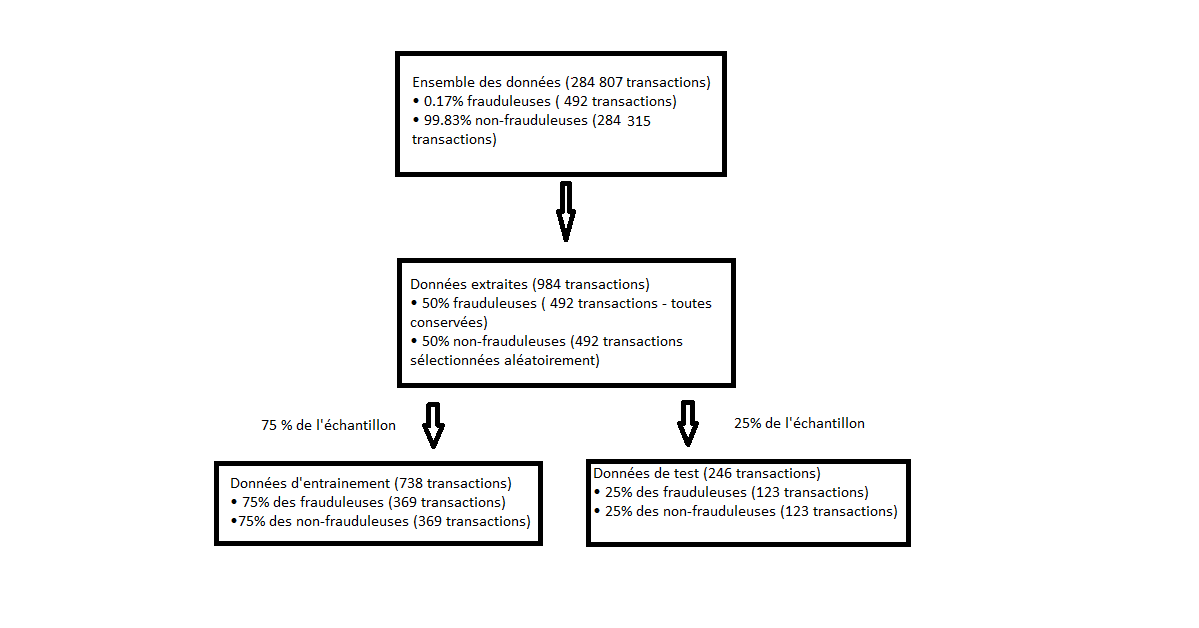

In [ ]:
# Notre sous-ensemble de données contiendra l'intégralité des transations frauduleuses représentant 492 transactions.
# 50% de cet ensemble sera des transactions frauduleuses, c'est-à-dire, 492 transactions.
# 50% de cet ensemble sera des transactions non-frauduleuses donc 492 transactions à selectionner parmis les 284 807 non-frauduleuses.

# On sélectionne toutes les transactions non-frauduleuses.
nonfrauduleux = data[data$Class == 0,]
# On sélectionne toutes les transactions frauduleuses.
frauduleux = data[data$Class == 1,] 

# Notre sous-ensemble de données contiendra donc 984 transactions.
# Pour les transactions frauduleuses, il suffit de toutes les récupérer.
# Pour les transactions non-frauduleuses, il faut extraire un échantillon de 492 transactions parmi les 284 807.

# On crée donc une liste aléatoire de 492 valeurs.
set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
# On sélectionne aléatoirement 492 nombres parmi les 284807-492 = 284315 transactions non-frauduleuses du dataset.
liste <- sample(1:284315, 492, replace = FALSE) 

# On va maintenant sélectionner ces 492 transactions parmis notre liste non-frauduleux et grâce à notre liste aléatoire créée.

nonfrauduleux492 <- nonfrauduleux[liste,]
sousdata <- rbind(nonfrauduleux492, frauduleux)
# On a bien 984 observations avec nos 31 variables.
str(sousdata)

Classes ‘data.table’ and 'data.frame':	984 obs. of  31 variables:
 $ Time  : num  33252 77382 85011 33539 74403 ...
 $ V1    : num  1.259 -0.182 -0.771 -0.335 -0.409 ...
 $ V2    : num  -0.0548 1.3692 0.8726 0.3505 -0.3981 ...
 $ V3    : num  0.315 -0.22 1.713 0.959 2.09 ...
 $ V4    : num  -0.112 0.787 -0.435 -1.139 -2.427 ...
 $ V5    : num  -0.497 0.288 0.435 0.307 -0.802 ...
 $ V6    : num  -0.702 -0.681 -0.945 0.415 -1.019 ...
 $ V7    : num  -0.1516 0.5554 0.9451 -0.0806 -0.0501 ...
 $ V8    : num  -0.0555 0.3146 -0.3224 -0.0316 -0.2887 ...
 $ V9    : num  0.359 -0.967 -0.263 -1.414 -2.182 ...
 $ V10   : num  -0.212 0.146 -0.216 0.608 0.94 ...
 $ V11   : num  -0.122 0.764 0.375 -1.18 -0.821 ...
 $ V12   : num  -0.0944 0.8291 0.6549 -0.9723 -1.9917 ...
 $ V13   : num  -0.651 0.242 0.884 1.033 -0.966 ...
 $ V14   : num  0.41 0.941 -0.285 -0.388 -0.399 ...
 $ V15   : num  1.4684 -0.0753 0.4266 1.4053 0.1988 ...
 $ V16   : num  -0.00225 -0.15431 -0.24147 0.74753 -0.30474 ...
 $ V17  

In [ ]:
# On cherche maintenant à diviser notre sous-ensemble de données en 2 ensembles : jeu d'entrainement et jeu de test.
# On a choisi de prendre une taille du jeu d'entrainement égale à 75% du sous-ensemble de données.
# En effet, plus on a de données à entrainer plus on aura de bons résultats.
# Cela correspond au total à 738 transactions.
# Comme on veut garder notre ratio de transaction frauduleuses et non frauduleuse à 50%,
# on aura donc 738/2 = 369 transactions frauduleuses et 369 non-frauduleuses.
# Le jeu de test aura donc une taille égale à 25% du sous-ensemble de données, c'est-a-dire, 246 transactions.
# On aura donc 123 transactions frauduleuses et 123 transactions non-frauduleuses.

# On crée une même liste aléatoires de valeurs pour extraire les transactions frauduleuses f et non frauduleuses nf.
# Même liste car on veut extraire le même nombre de transactions.
set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
# On sélectionne aléatoirement 369 nombres parmi les 492 (de sousdata) pour avoir la liste du jeu d'entrainement.
listetrain <- sample(1:492, 369, replace = FALSE) 

# On créer notre jeu d'entrainement. Pour cela on extrait de sousdata les transactions en utilisant nos listes aléatoires.
nonfrauduleuxtrain <- nonfrauduleux492[listetrain,]
frauduleuxtrain <- frauduleux[listetrain,]
datatrain <- rbind(nonfrauduleuxtrain, frauduleuxtrain)

# Maintenant, on va créer notre jeu de test constituées des transactions restantes de sousdata,
# c'est-à-dire, celles qui n'ont pas été sélectionné pour le jeu d'entrainement.

nonfrauduleuxtest<- nonfrauduleux492[-listetrain,]
frauduleuxtest<- frauduleux[-listetrain,]
datatest<- rbind(nonfrauduleuxtest, frauduleuxtest)

summary(datatrain)
#str(datatest)

      Time              V1                 V2                  V3          
 Min.   :   406   Min.   :-30.5524   Min.   :-14.19971   Min.   :-31.1037  
 1st Qu.: 47014   1st Qu.: -2.7479   1st Qu.: -0.07971   1st Qu.: -5.0724  
 Median : 78715   Median : -0.7221   Median :  0.94859   Median : -1.3690  
 Mean   : 87980   Mean   : -2.3848   Mean   :  1.81115   Mean   : -3.4786  
 3rd Qu.:134756   3rd Qu.:  1.0324   3rd Qu.:  2.75687   3rd Qu.:  0.3995  
 Max.   :172199   Max.   :  2.3267   Max.   : 22.05773   Max.   :  2.9852  
       V4                 V5                 V6                 V7          
 Min.   :-4.01603   Min.   :-22.1055   Min.   :-6.40627   Min.   :-43.5572  
 1st Qu.:-0.05841   1st Qu.: -1.8170   1st Qu.:-1.52487   1st Qu.: -3.0940  
 Median : 1.29453   Median : -0.4073   Median :-0.68644   Median : -0.5359  
 Mean   : 2.24576   Mean   : -1.6024   Mean   :-0.70154   Mean   : -2.6923  
 3rd Qu.: 4.17113   3rd Qu.:  0.4314   3rd Qu.:-0.02224   3rd Qu.:  0.3619  
 Max. 

Avec ce choix d'extraction des données, si l'on tente d'appliquer le modèle à notre jeu d'entrainement (datatrain), on va rencontrer un problème : le modèle ne converge pas. 

On suppose que ceci est dû à un trop faible nombre de données d'entrainement. Une manière de remédier à ce problème est de faire une sélection de variables. On réalisera cette sélection en fonction de la corrélation entre chaque variable et la variable 'Class'. On étudiera les 2 cas suivants :
- Garder des variables qui ne sont pas trop corrélées avec 'Class'.
- Garder des variables qui ne sont pas trop peu corrélées avec 'Class'.

In [ ]:
cor_Class_train <- cor(datatrain[,-31], datatrain$Class)

print(paste("abs(Corr)<0.1",sum(abs(cor_Class_train[,1])<0.1)))
print(paste("abs(Corr)<0.2",sum(abs(cor_Class_train[,1])<0.2)))
print(paste("abs(Corr)>0.9",sum(abs(cor_Class_train[,1])>0.9)))
print(paste("abs(Corr)>0.8",sum(abs(cor_Class_train[,1])>0.8)))
print(paste("abs(Corr)>0.7",sum(abs(cor_Class_train[,1])>0.7)))

[1] "abs(Corr)<0.1 10"
[1] "abs(Corr)<0.2 14"
[1] "abs(Corr)>0.9 0"
[1] "abs(Corr)>0.8 0"
[1] "abs(Corr)>0.7 2"


On a compté le nombre de variables dont les corrélations étaient très faibles ou très importantes et réaliser des tests par rapport à différents seuils. Le but étant de garder une grande partie de nos variables et de prendre pour seuil une valeur qui enlève seulement un petit nombre de variables. \
Pour notre 1er cas, on va choisir les variables dont la corrélation est inférieure à 0.7. \
Pour notre 2ème cas, on va choisir les variables dont la corrélation est supérieure à 0.1. \

**Cas où l'on a une corrélation des variables avec Class inférieure à 0.7**

In [ ]:
# Sélection de variables pour le jeu de données d'entrainement.
# On calcule le coefficient de corrélation entre chaque variable (sauf Class) et la variable 'Class'.
cor_Class_train <- cor(datatrain[,-31], datatrain$Class)
# On ajoute une ligne avec l'indexe des variables de la dataframe pour être utilisé plus tard.
indexe_train<- 1:nrow(cor_Class_train)
cor_Class_train<- cbind(cor_Class_train, indexe_train)
# On ne garde que les variable dont le coefficient de corrélation est strictement inférieur à 0.7.
cor_Class_train_Inf <- cor_Class_train[abs(cor_Class_train[,1])<0.7,]
# On récupère les indexes des variables respectant notre contrainte.
var<- as.vector(cor_Class_train_Inf[,2])
var <- as.integer(var)
# On crée datatrainInf correspondant aux données d'entrainement avec seulement les variables que l'on a gardé.
datatrainInf <- datatrain[, var, with=FALSE]
# On rajoute la classe à la fin.
datatrainInf <-cbind(datatrainInf, datatrain[,31])
write.csv(datatrainInf, 'datatraininf.csv')

# On ne sélectionne par la suite que ces variables pour le jeu de données de test.
datatestInf <- datatest[, var, with=FALSE]
# On rajoute la classe à la fin.
datatestInf <-cbind(datatestInf, datatest[,31])
write.csv(datatestInf, 'datatestInf.csv')

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrainInf, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.5
predictions <- predict(model, datatestInf, type='response')
predictions.results <- ifelse(predictions > 0.5, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy)
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatestInf$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] 0.741377

          Reference
Prediction   0   1
         0 115  11
         1   8 112

[1] "accuracy :  0.922764227642276"
[1] "sensitivity :  0.910569105691057"
[1] "specificity :  0.934959349593496"
[1] "False negatives :  0.0894308943089431"
[1] "False positives:  0.0650406504065041"


**Cas où l'on a une corrélation des variables avec Class supérieure à 0.1**

In [ ]:
# Sélection de variables pour le jeu de données d'entrainement.
# On calcule le coefficient de corrélation entre chaque variable (sauf Class) et la variable 'Class'.
cor_Class_train <- cor(datatrain[,-31], datatrain$Class)
# On ajoute une ligne avec l'indexe des variables de la dataframe pour être utilisé plus tard.
indexe_train<- 1:nrow(cor_Class_train)
cor_Class_train<- cbind(cor_Class_train, indexe_train)
# On ne garde que les variables dont le coefficient de corrélation est strictement supérieure à 0.1.
cor_Class_train_Sup <- cor_Class_train[abs(cor_Class_train[,1])>0.1,]
# On récupère les indexes des variables respectant notre contrainte.
var<- as.vector(cor_Class_train_Sup[,2])
var <- as.integer(var)
# On crée datatrainSup correspondant aux données d'entrainement avec seulement les variables que l'on a gardé.
datatrainSup <- datatrain[, var, with=FALSE]
# On rajoute la classe à la fin.
datatrainSup <-cbind(datatrainSup,datatrain[,31])
write.csv(datatrainSup, 'datatrainsup.csv')

# On ne sélectionne par la suite que ces variables pour le jeu de données de test.
datatestSup <- datatest[, var, with=FALSE]
# On rajoute la classe à la fin.
datatestSup <-cbind(datatestSup,datatest[,31])
write.csv(datatestSup, 'datatestSup.csv')

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrainSup, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.5.
predictions <- predict(model, datatestSup, type='response')
predictions.results <- ifelse(predictions > 0.5, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy)
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatestSup$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif
specificity <- cM$byClass[2] # Taux de vrai négatif
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif
falsePos= 1-specificity # Taux de faux positif
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] 0.8058009

          Reference
Prediction   0   1
         0 120  10
         1   3 113

[1] "accuracy :  0.947154471544715"
[1] "sensitivity :  0.91869918699187"
[1] "specificity :  0.975609756097561"
[1] "False negatives :  0.0813008130081301"
[1] "False positives:  0.024390243902439"


Au vu de nos résultats, on en conclut que la sélection de variables dont la corrélation avec la variable 'Class' est supérieure à 0.1, c'est-à-dire, en supprimant les variables dont la corrélation est trop forte, nous apporte une meilleure prédiction. En effet, la proportion de faux négatif ainsi que la proportion de faux positif est plus faible dans ce cas-là. On va donc conserver ce cas pour notre analyse finale.

## **Partie 2 : Extraction des données et division en deux jeux de données :  Cas où l'on garde l'intégralité des transactions de la base de données**

In [ ]:
# Dans cette version on conserve l'intégralité de nos données.
# On sélectionne toutes les transactions non-frauduleuses.
nonfrauduleux = data[data$Class == 0,]
# On sélectionne toutes les transactions frauduleuses.
frauduleux = data[data$Class == 1,] 

# On va créer le jeu de données d'entrainement.
# Celui-ci devra respecter le ratio frauduleux - non-fraduleux de la base de données, c'est-à-dire, 0.017% de transactions frauduleuses.
# D'autre part, le jeu de données d'entrainement contiendra 75% des transactions de la base de données de départ.
# On aura donc : 492*0.75 = 369 transactions frauduleuses dans le jeu d'entrainement.
# Et 284315*0.75 = 213236 transactions non-frauduleuses dans le jeu d'entrainement.

# On crée donc une liste aléatoire de 369 valeurs parmis les 492.
set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
listetrainf <- sample(1:492, 369, replace = FALSE) 
# Et une liste aléatoire de 213236 valeurs parmis les 284315.
set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
listetrainnf <- sample(1:284315, 213236, replace = FALSE) 

frauduleuxtrain <- frauduleux[listetrainf,]
nonfrauduleuxtrain <- nonfrauduleux[listetrainnf,]
datatrain <- rbind(nonfrauduleuxtrain, frauduleuxtrain)

# On crée le jeu de données de test avec les transactions restantes.
frauduleuxtest <- frauduleux[-listetrainf,]
nonfrauduleuxtest <- nonfrauduleux[-listetrainnf,]
datatest <- rbind(nonfrauduleuxtest, frauduleuxtest)

str(datatrain)
str(datatest)

Classes ‘data.table’ and 'data.frame':	213605 obs. of  31 variables:
 $ Time  : num  33252 77382 85011 33539 74403 ...
 $ V1    : num  1.259 -0.182 -0.771 -0.335 -0.409 ...
 $ V2    : num  -0.0548 1.3692 0.8726 0.3505 -0.3981 ...
 $ V3    : num  0.315 -0.22 1.713 0.959 2.09 ...
 $ V4    : num  -0.112 0.787 -0.435 -1.139 -2.427 ...
 $ V5    : num  -0.497 0.288 0.435 0.307 -0.802 ...
 $ V6    : num  -0.702 -0.681 -0.945 0.415 -1.019 ...
 $ V7    : num  -0.1516 0.5554 0.9451 -0.0806 -0.0501 ...
 $ V8    : num  -0.0555 0.3146 -0.3224 -0.0316 -0.2887 ...
 $ V9    : num  0.359 -0.967 -0.263 -1.414 -2.182 ...
 $ V10   : num  -0.212 0.146 -0.216 0.608 0.94 ...
 $ V11   : num  -0.122 0.764 0.375 -1.18 -0.821 ...
 $ V12   : num  -0.0944 0.8291 0.6549 -0.9723 -1.9917 ...
 $ V13   : num  -0.651 0.242 0.884 1.033 -0.966 ...
 $ V14   : num  0.41 0.941 -0.285 -0.388 -0.399 ...
 $ V15   : num  1.4684 -0.0753 0.4266 1.4053 0.1988 ...
 $ V16   : num  -0.00225 -0.15431 -0.24147 0.74753 -0.30474 ...
 $ V1

En conservant l'intégralité de nos données, on peut cette fois-ci appliquer le modèle directement sans réaliser la sélection de variables. On va néanmoins réaliser le test des 3 cas :
- 1er cas : on applique directement le modèle en conservant toutes nos variables.
- 2ème cas : on va choisir les variables dont la corrélation est inférieure à 0.7.
- 3ème cas : on va choisir les variables dont la corrélation est supérieure à 0.1.


**1er cas : test sans réduction de variables**

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrain, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.5.
predictions <- predict(model, datatest, type='response')
predictions.results <- ifelse(predictions > 0.5, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy).
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatest$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

[1] 0.6910697

          Reference
Prediction     0     1
         0 71060    47
         1    19    76

[1] "accuracy :  0.999073059745513"
[1] "sensitivity :  0.617886178861789"
[1] "specificity :  0.999732691793638"
[1] "False negatives :  0.382113821138211"
[1] "False positives:  0.000267308206361894"


**2ème cas : Sélection des variables dont la corrélation avec Class est inférieure à 0.7**

In [ ]:
# Sélection de variables pour le jeu de données d'entrainement.
# On calcule le coefficient de corrélation entre chaque variable (sauf Class) et la variable 'Class'.
cor_Class_train <- cor(datatrain[,-31], datatrain$Class)
# On ajoute une ligne avec l'indexe des variables de la dataframe pour être utilisé plus tard.
indexe_train<- 1:nrow(cor_Class_train)
cor_Class_train<- cbind(cor_Class_train, indexe_train)
# On ne garde que les variables dont le coefficient de corrélation est strictement inférieur à 0.7.
cor_Class_train_Inf <- cor_Class_train[abs(cor_Class_train[,1])<0.7,]
# On récupère les indexes des variables respectant notre contrainte.
var<- as.vector(cor_Class_train_Inf[,2])
var <- as.integer(var)
# On crée datatrainInf correspondant aux données d'entrainement avec seulement les variables que l'on a gardé.
datatrainInf <- datatrain[, var, with=FALSE]
# On rajoute la classe à la fin.
datatrainInf <-cbind(datatrainInf,datatrain[,31])
write.csv(datatrainInf, 'datatraininf.csv')

# On ne sélectionne par la suite que ces variables pour le jeu de données de test.
datatestInf <- datatest[, var, with=FALSE]
# On rajoute la classe à la fin.
datatestInf <-cbind(datatestInf,datatest[,31])
write.csv(datatestInf, 'datatestInf.csv')

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrainInf, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représentes le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.5.
predictions <- predict(model, datatestInf, type='response')
predictions.results <- ifelse(predictions > 0.5, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy).
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatestInf$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

[1] 0.6910697

          Reference
Prediction     0     1
         0 71060    47
         1    19    76

[1] "accuracy :  0.999073059745513"
[1] "sensitivity :  0.617886178861789"
[1] "specificity :  0.999732691793638"
[1] "False negatives :  0.382113821138211"
[1] "False positives:  0.000267308206361894"


**3ème cas : Sélection de variables dont la corrélation des variables avec Class est supérieure à 0.1**

In [ ]:
# Sélection de variables pour le jeu de données d'entrainement.
# On calcule le coefficient de corrélation entre chaque variable (sauf Class) et la variable 'Class'.
cor_Class_train <- cor(datatrain[,-31], datatrain$Class)
# On ajoute une ligne avec l'indexe des variables de la dataframe pour être utilisé plus tard.
indexe_train<- 1:nrow(cor_Class_train)
cor_Class_train<- cbind(cor_Class_train, indexe_train)
# On ne garde que les variable dont le coefficient de corrélation est strictement supérieure à 0.1.
cor_Class_train_Sup <- cor_Class_train[abs(cor_Class_train[,1])>0.1,]
# On récupère les indexes des variables respectant notre contrainte.
var<- as.vector(cor_Class_train_Sup[,2])
var <- as.integer(var)
# On crée datatrainSup correspondant aux données d'entrainement avec seulement les variables que l'on a gardé.
datatrainSup <- datatrain[, var, with=FALSE]
# On rajoute la classe à la fin.
datatrainSup <-cbind(datatrainSup,datatrain[,31])
write.csv(datatrainSup, 'datatrainsup.csv')

# On ne sélectionne par la suite que ces variables pour le jeu de données de test.
datatestSup <- datatest[, var, with=FALSE]
# On rajoute la classe à la fin.
datatestSup <-cbind(datatestSup,datatest[,31])
write.csv(datatestSup, 'datatestSup.csv')

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrainSup, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
print(paste('R2 : ', R2))
# On prend notre seuil de décision à 0.5.
predictions <- predict(model, datatestSup, type='response')
predictions.results <- ifelse(predictions > 0.5, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy).
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatestSup$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

[1] "R2 :  0.669601861527984"


          Reference
Prediction     0     1
         0 71062    47
         1    17    76

[1] "accuracy :  0.999101148844134"
[1] "sensitivity :  0.617886178861789"
[1] "specificity :  0.999760829499571"
[1] "False negatives :  0.382113821138211"
[1] "False positives:  0.000239170500429098"


Au vu des résultats, on peut conclure qu'ici la sélection des variables n'a pratiquement aucune incidence sur les résultats. Les probabilités de faux positifs ou faux négatifs sont pratiquement identiques. On va donc conserver le cas où l'on garde toutes nos variables pour l'analyse finale.

## **Partie 3 : Extraction des données et division en deux jeux de données :  Cas où les 492 données frauduleuses représentent 10% des données extraites**

Dans cette partie, on créera une base de données extraites de notre base de données originales. Celle-ci contiendra les 492 transactions frauduleuses qui représenteront 10% des transactions totales. Il y aura donc : $(492*90)/10 = 4428$ transactions non-frauduleuses. Notre sous-base de données contiendra donc $4428+492=4920$ transactions. A partir de cette sous-base, on créera notre jeu d'entrainement et notre jeu de test.

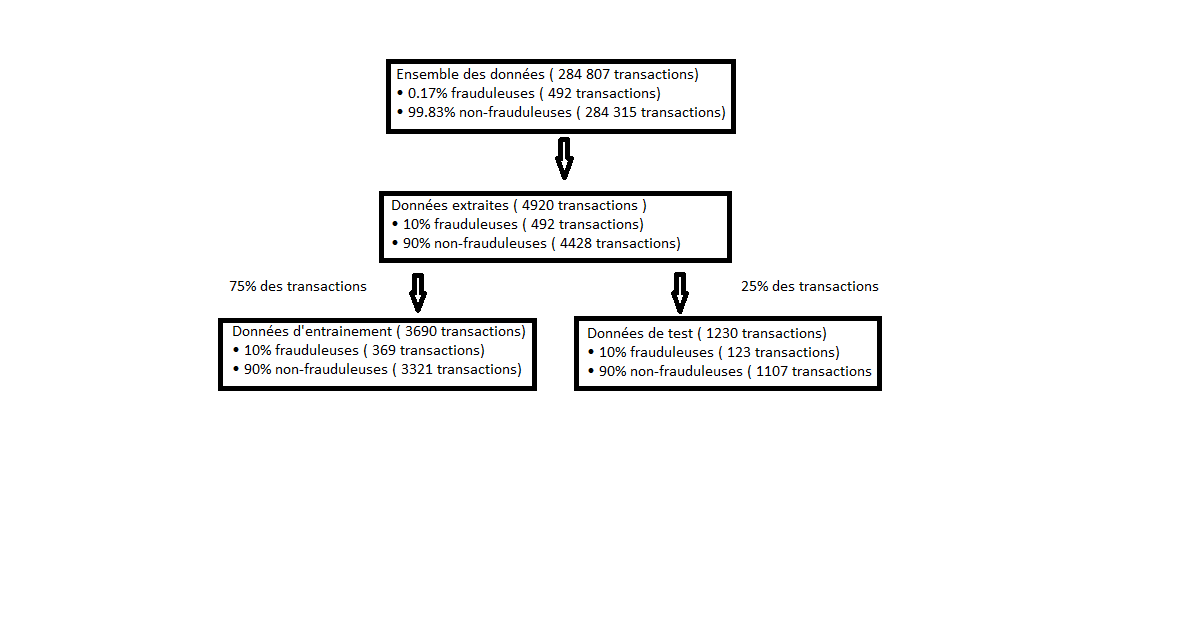

In [ ]:
# On sélectionne toutes les transactions non-frauduleuses.
nonfrauduleux = data[data$Class == 0,]
# On sélectionne toutes les transactions frauduleuses.
frauduleux = data[data$Class == 1,] 

# On crée donc une liste alétoire de 4464 valeurs.
set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
# On sélectionne aléatoirement 4464 nombres parmi les 284807-492 = 284315 transactions non-frauduleuses du dataset.
liste <- sample(1:284315, 4428, replace = FALSE) 

# On va maintenant sélectionner ces transactions parmis notre liste nonfrauduleux et grâce à notre liste aléatoire créée.

nonfrauduleux4428 <- nonfrauduleux[liste,]
sousdata <- rbind(nonfrauduleux4428, frauduleux)
sum(sousdata$Class)
str(sousdata)

[1] 492

Classes ‘data.table’ and 'data.frame':	4920 obs. of  31 variables:
 $ Time  : num  33252 77382 85011 33539 74403 ...
 $ V1    : num  1.259 -0.182 -0.771 -0.335 -0.409 ...
 $ V2    : num  -0.0548 1.3692 0.8726 0.3505 -0.3981 ...
 $ V3    : num  0.315 -0.22 1.713 0.959 2.09 ...
 $ V4    : num  -0.112 0.787 -0.435 -1.139 -2.427 ...
 $ V5    : num  -0.497 0.288 0.435 0.307 -0.802 ...
 $ V6    : num  -0.702 -0.681 -0.945 0.415 -1.019 ...
 $ V7    : num  -0.1516 0.5554 0.9451 -0.0806 -0.0501 ...
 $ V8    : num  -0.0555 0.3146 -0.3224 -0.0316 -0.2887 ...
 $ V9    : num  0.359 -0.967 -0.263 -1.414 -2.182 ...
 $ V10   : num  -0.212 0.146 -0.216 0.608 0.94 ...
 $ V11   : num  -0.122 0.764 0.375 -1.18 -0.821 ...
 $ V12   : num  -0.0944 0.8291 0.6549 -0.9723 -1.9917 ...
 $ V13   : num  -0.651 0.242 0.884 1.033 -0.966 ...
 $ V14   : num  0.41 0.941 -0.285 -0.388 -0.399 ...
 $ V15   : num  1.4684 -0.0753 0.4266 1.4053 0.1988 ...
 $ V16   : num  -0.00225 -0.15431 -0.24147 0.74753 -0.30474 ...
 $ V17 

In [ ]:
# On cherche maintenant à diviser notre sous-ensemble de données en 2 ensembles : jeu d'entrainement et jeu de test.
# On a choisi de prendre une taille du jeu d'entrainement égale à 75% du sous-ensemble de données.
# En effet, plus on a de données à entrainer, plus on aura de bons résultats.
# Cela correspond au total à 3690 transactions.
# Comme on veut garder notre ratio de transaction frauduleuses et non frauduleuses,
# on aura donc 492*0.75 = 369 transactions frauduleuses et 4428*0.75 = 3321 transactions non-frauduleuses.

set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
# On sélectionne aléatoirement 369 nombres parmi les 492 (de sousdata) pour avoir la liste du jeu d'entrainement frauduleux.
listetrainf <- sample(1:492, 369, replace = FALSE) 
# Pour les non-frauduleuses:
set.seed(1)
listetrainnf <- sample(1:4428, 3321, replace = FALSE) 

# On créer notre jeu d'entrainement. Pour cela on extrait de sousdata les transactions en utilisant nos listes aléatoires.
nonfrauduleuxtrain <- nonfrauduleux4428[listetrainnf,]
frauduleuxtrain <- frauduleux[listetrainf,]
datatrain <- rbind(nonfrauduleuxtrain, frauduleuxtrain)

# Maintenant, on va créer notre jeu de test constitué des transactions restantes de sousdata,
# c'est-à-dire, celles qui n'ont pas été sélectionné pour le jeu d'entrainement.

nonfrauduleuxtest<- nonfrauduleux4428[-listetrainnf,]
frauduleuxtest<- frauduleux[-listetrainf,]
datatest<- rbind(nonfrauduleuxtest, frauduleuxtest)

summary(datatrain)
#str(datatest)

      Time              V1                 V2                 V3           
 Min.   :    29   Min.   :-35.9051   Min.   :-31.0414   Min.   :-31.10368  
 1st Qu.: 52915   1st Qu.: -1.1268   1st Qu.: -0.4835   1st Qu.: -1.28813  
 Median : 84204   Median : -0.2201   Median :  0.2107   Median : -0.00823  
 Mean   : 94052   Mean   : -0.5149   Mean   :  0.3793   Mean   : -0.71253  
 3rd Qu.:139458   3rd Qu.:  1.2601   3rd Qu.:  1.0152   3rd Qu.:  0.94109  
 Max.   :172782   Max.   :  2.3635   Max.   : 22.0577   Max.   :  3.51175  
       V4                V5                  V6                 V7           
 Min.   :-5.6006   Min.   :-22.10553   Min.   :-10.8196   Min.   :-43.55724  
 1st Qu.:-0.7659   1st Qu.: -0.77892   1st Qu.: -0.8663   1st Qu.: -0.68336  
 Median : 0.1087   Median : -0.08523   Median : -0.3449   Median : -0.01313  
 Mean   : 0.4311   Mean   : -0.30074   Mean   : -0.1381   Mean   : -0.53254  
 3rd Qu.: 1.0561   3rd Qu.:  0.59163   3rd Qu.:  0.3373   3rd Qu.:  0.54570  


Dans cette partie, on peut cette fois-ci appliquer le modèle directement sans réaliser la sélection de variables. On va néanmoins réaliser le test des 3 cas :
- 1er cas : on applique directement le modèle en conservant toutes nos variables.
- 2ème cas : on va choisir les variables dont la corrélation est inférieure à 0.7.
- 3ème cas : on va choisir les variables dont la corrélation est supérieure à 0.1.

**1er cas : test sans sélection de variable**

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrain, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.5.
predictions <- predict(model, datatest, type='response')
predictions.results <- ifelse(predictions > 0.5, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy).
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatest$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] 0.8047635

          Reference
Prediction    0    1
         0 1104   15
         1    3  108

[1] "accuracy :  0.985365853658537"
[1] "sensitivity :  0.878048780487805"
[1] "specificity :  0.997289972899729"
[1] "False negatives :  0.121951219512195"
[1] "False positives:  0.00271002710027102"


**2ème cas : on va choisir les variables dont la corrélation est inférieure à 0.7**

In [ ]:
# Sélection de variables pour le jeu de données d'entrainement.
# On calcule le coefficient de corrélation entre chaque variable (sauf Class) et la variable 'Class'.
cor_Class_train <- cor(datatrain[,-31], datatrain$Class)
# On ajoute une ligne avec l'indexe des variables de la dataframe pour être utilisé plus tard.
indexe_train<- 1:nrow(cor_Class_train)
cor_Class_train<- cbind(cor_Class_train, indexe_train)
# On ne garde que les variable dont le coefficient de corrélation est strictement inférieur à 0.7.
cor_Class_train_Inf <- cor_Class_train[abs(cor_Class_train[,1])<0.7,]
# On récupère les indexes des variables respectant notre contrainte.
var<- as.vector(cor_Class_train_Inf[,2])
var <- as.integer(var)
# On crée datatrainInf correspondant aux données d'entrainement avec seulement les variables que l'on a gardé.
datatrainInf <- datatrain[, var, with=FALSE]
# On rajoute la classe à la fin.
datatrainInf <-cbind(datatrainInf,datatrain[,31])
write.csv(datatrainInf, 'datatraininf.csv')

# On ne sélectionne par la suite que ces variables pour le jeu de données de test.
datatestInf <- datatest[, var, with=FALSE]
# On rajoute la classe à la fin.
datatestInf <-cbind(datatestInf,datatest[,31])
write.csv(datatestInf, 'datatestInf.csv')

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrainInf, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.5.
predictions <- predict(model, datatest, type='response')
predictions.results <- ifelse(predictions > 0.5, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy).
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatestInf$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] 0.7914971

          Reference
Prediction    0    1
         0 1104   15
         1    3  108

[1] "accuracy :  0.985365853658537"
[1] "sensitivity :  0.878048780487805"
[1] "specificity :  0.997289972899729"
[1] "False negatives :  0.121951219512195"
[1] "False positives:  0.00271002710027102"


**3ème cas : sélection des variables dont la corrélation avec 'Class' est supérieure à 0.1**

In [ ]:
# Sélection de variables pour le jeu de données d'entrainement.
# On calcule le coefficient de corrélation entre chaque variable (sauf Class) et la variable 'Class'.
cor_Class_train <- cor(datatrain[,-31], datatrain$Class)
# On ajoute une ligne avec l'indexe des variables de la dataframe pour être utilisé plus tard.
indexe_train<- 1:nrow(cor_Class_train)
cor_Class_train<- cbind(cor_Class_train, indexe_train)
# On ne garde que les variable dont le coefficient de corrélation est strictement supérieure à 0.1.
cor_Class_train_Sup <- cor_Class_train[abs(cor_Class_train[,1])>0.1,]
# On récupère les indexes des variables respectant notre contrainte.
var<- as.vector(cor_Class_train_Inf[,2])
var <- as.integer(var)
# On crée datatrainInf correspondant aux données d'entrainement avec seulement les variables que l'on a gardé.
datatrainSup <- datatrain[, var, with=FALSE]
# On rajoute la classe à la fin.
datatrainSup <-cbind(datatrainSup,datatrain[,31])
write.csv(datatrainSup, 'datatrainsup.csv')

# On ne sélectionne par la suite que ces variables pour le jeu de données de test.
datatestSup <- datatest[, var, with=FALSE]
# On rajoute la classe à la fin.
datatestSup <-cbind(datatestSup,datatest[,31])
write.csv(datatestSup, 'datatestSup.csv')

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrainSup, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.5.
predictions <- predict(model, datatest, type='response')
predictions.results <- ifelse(predictions > 0.5, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy).
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatestSup$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] 0.7914971

          Reference
Prediction    0    1
         0 1104   15
         1    3  108

[1] "accuracy :  0.985365853658537"
[1] "sensitivity :  0.878048780487805"
[1] "specificity :  0.997289972899729"
[1] "False negatives :  0.121951219512195"
[1] "False positives:  0.00271002710027102"


Au vu des résultats, on peut conclure qu'ici la sélection des variables n'a pratiquement aucune incidence sur les résultats. Les probabilités de faux positifs ou faux négatifs sont pratiquement identiques. On va donc conserver le cas où l'on garde toutes nos variables pour l'analyse finale.

## **Partie 4 : Extraction des données et division en deux jeux de données : Cas où les 492 données frauduleuses représentent 25% des données extraites**

Dans cette partie, on créera une base de données extraites de notre base de données originales. Celle-ci contiendra les 492 transactions frauduleuses qui représenteront 25% des transactions totales. Il y aura donc : $(492*75)/25= 1476$ transactions non-frauduleuses. Notre sous-base de données contiendra donc $1476+492=1968$ transactions. A partir de cette sous-base, on créera notre jeu d'entrainement et notre jeu de test.

In [ ]:
# On sélectionne toutes les transactions non-frauduleuses.
nonfrauduleux = data[data$Class == 0,]
# On sélectionne toutes les transactions frauduleuses.
frauduleux = data[data$Class == 1,] 

# On crée donc une liste alétoire de 1476 valeurs.
set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
# On sélectionne aléatoirement 1476 nombres parmi les 284807-492 = 284315 transactions non-frauduleuses du dataset.
liste <- sample(1:284315, 1476, replace = FALSE) 

# On va maintenant sélectionner ces transactions parmis notre liste nonfrauduleux et grâce à notre liste aléatoire créée.

nonfrauduleux1476 <- nonfrauduleux[liste,]
sousdata <- rbind(nonfrauduleux1476, frauduleux)
sum(sousdata$Class)
str(sousdata)

[1] 492

Classes ‘data.table’ and 'data.frame':	1968 obs. of  31 variables:
 $ Time  : num  33252 77382 85011 33539 74403 ...
 $ V1    : num  1.259 -0.182 -0.771 -0.335 -0.409 ...
 $ V2    : num  -0.0548 1.3692 0.8726 0.3505 -0.3981 ...
 $ V3    : num  0.315 -0.22 1.713 0.959 2.09 ...
 $ V4    : num  -0.112 0.787 -0.435 -1.139 -2.427 ...
 $ V5    : num  -0.497 0.288 0.435 0.307 -0.802 ...
 $ V6    : num  -0.702 -0.681 -0.945 0.415 -1.019 ...
 $ V7    : num  -0.1516 0.5554 0.9451 -0.0806 -0.0501 ...
 $ V8    : num  -0.0555 0.3146 -0.3224 -0.0316 -0.2887 ...
 $ V9    : num  0.359 -0.967 -0.263 -1.414 -2.182 ...
 $ V10   : num  -0.212 0.146 -0.216 0.608 0.94 ...
 $ V11   : num  -0.122 0.764 0.375 -1.18 -0.821 ...
 $ V12   : num  -0.0944 0.8291 0.6549 -0.9723 -1.9917 ...
 $ V13   : num  -0.651 0.242 0.884 1.033 -0.966 ...
 $ V14   : num  0.41 0.941 -0.285 -0.388 -0.399 ...
 $ V15   : num  1.4684 -0.0753 0.4266 1.4053 0.1988 ...
 $ V16   : num  -0.00225 -0.15431 -0.24147 0.74753 -0.30474 ...
 $ V17 

In [ ]:
set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
# On sélectionne aléatoirement 369 nombres parmi les 492 (de sousdata) pour avoir la liste du jeu d'entrainement frauduleux.
listetrainf <- sample(1:492, 369, replace = FALSE) 
# Pour les transactions non-frauduleuses 1476*0.75 = 1107 parmi les 1476.
set.seed(1)
listetrainnf <- sample(1:1476, 1107, replace = FALSE) 

# On créer notre jeu d'entrainement. Pour cela on extrait de sousdata les transactions en utilisant nos listes aléatoires.
nonfrauduleuxtrain <- nonfrauduleux1476[listetrainnf,]
frauduleuxtrain <- frauduleux[listetrainf,]
datatrain <- rbind(nonfrauduleuxtrain, frauduleuxtrain)

# Maintenant, on va créer notre jeu de tests constituées des transactions restantes de sousdata,
# c'est-à-dire, celles qui n'ont pas été sélectionné pour le jeu d'entrainement.

nonfrauduleuxtest <- nonfrauduleux1476[-listetrainnf,]
frauduleuxtest <- frauduleux[-listetrainf,]
datatest <- rbind(nonfrauduleuxtest, frauduleuxtest)

summary(datatrain)
#str(datatest)

      Time              V1                 V2                 V3          
 Min.   :    29   Min.   :-30.5524   Min.   :-29.7006   Min.   :-31.1037  
 1st Qu.: 49818   1st Qu.: -1.5791   1st Qu.: -0.3838   1st Qu.: -1.9910  
 Median : 80034   Median : -0.4002   Median :  0.3485   Median : -0.2822  
 Mean   : 90145   Mean   : -1.2519   Mean   :  0.8851   Mean   : -1.7207  
 3rd Qu.:135124   3rd Qu.:  1.1966   3rd Qu.:  1.3555   3rd Qu.:  0.7774  
 Max.   :172556   Max.   :  2.3593   Max.   : 22.0577   Max.   :  3.2036  
       V4                V5                 V6                 V7          
 Min.   :-3.7057   Min.   :-22.1055   Min.   :-10.8196   Min.   :-43.5572  
 1st Qu.:-0.6186   1st Qu.: -1.0255   1st Qu.: -1.0901   1st Qu.: -1.1210  
 Median : 0.4222   Median : -0.1695   Median : -0.4551   Median : -0.1166  
 Mean   : 1.1268   Mean   : -0.7467   Mean   : -0.3982   Mean   : -1.3741  
 3rd Qu.: 2.0123   3rd Qu.:  0.5550   3rd Qu.:  0.2095   3rd Qu.:  0.4667  
 Max.   :12.1147   

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrain, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.5.
predictions <- predict(model, datatest, type='response')
predictions.results <- ifelse(predictions > 0.5, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy).
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatest$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] 0.8497212

          Reference
Prediction   0   1
         0 363  10
         1   6 113

[1] "accuracy :  0.967479674796748"
[1] "sensitivity :  0.91869918699187"
[1] "specificity :  0.983739837398374"
[1] "False negatives :  0.0813008130081301"
[1] "False positives:  0.016260162601626"


**Cas où l'on a une corrélation des variables avec Class inférieure à 0.7**

In [ ]:
# Sélection de variables pour le jeu de données d'entrainement.
# On calcule le coefficient de corrélation entre chaque variable (sauf Class) et la variable 'Class'.
cor_Class_train <- cor(datatrain[,-31], datatrain$Class)
# On ajoute une ligne avec l'indexe des variables de la dataframe pour être utilisé plus tard.
indexe_train<- 1:nrow(cor_Class_train)
cor_Class_train<- cbind(cor_Class_train, indexe_train)
# On ne garde que les variable dont le coefficient de corrélation est strictement inférieur à 0.7.
cor_Class_train_Inf <- cor_Class_train[abs(cor_Class_train[,1])<0.7,]
# On récupère les indexes des variables respectant notre contrainte.
var<- as.vector(cor_Class_train_Inf[,2])
var <- as.integer(var)
# On crée datatrainInf correspondant aux données d'entrainement avec seulement les variables que l'on a gardé.
datatrainInf <- datatrain[, var, with=FALSE]
# On rajoute la classe à la fin.
datatrainInf <-cbind(datatrainInf,datatrain[,31])
write.csv(datatrainInf, 'datatraininf.csv')

# On ne sélectionne par la suite que ces variables pour le jeu de données de test.
datatestInf <- datatest[, var, with=FALSE]
# On rajoute la classe à la fin.
datatestInf <-cbind(datatestInf,datatest[,31])
write.csv(datatestInf, 'datatestInf.csv')

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrainInf, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.5
predictions <- predict(model, datatestInf, type='response')
predictions.results <- ifelse(predictions > 0.5, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy)
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatestInf$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] 0.7182439

          Reference
Prediction   0   1
         0 364  17
         1   5 106

[1] "accuracy :  0.955284552845528"
[1] "sensitivity :  0.861788617886179"
[1] "specificity :  0.986449864498645"
[1] "False negatives :  0.138211382113821"
[1] "False positives:  0.013550135501355"


**Cas où l'on a une corrélation des variables avec Class supérieure à 0.1**

In [ ]:
# Sélection de variables pour le jeu de données d'entrainement.
# On calcule le coefficient de corrélation entre chaque variable (sauf Class) et la variable 'Class'.
cor_Class_train <- cor(datatrain[,-31], datatrain$Class)
# On ajoute une ligne avec l'indexe des variables de la dataframe pour être utilisé plus tard.
indexe_train<- 1:nrow(cor_Class_train)
cor_Class_train<- cbind(cor_Class_train, indexe_train)
# On ne garde que les variables dont le coefficient de corrélation est strictement supérieure à 0.1.
cor_Class_train_Sup <- cor_Class_train[abs(cor_Class_train[,1])>0.1,]
# On récupère les indexes des variables respectant notre contrainte.
var<- as.vector(cor_Class_train_Sup[,2])
var <- as.integer(var)
# On crée datatrainSup correspondant aux données d'entrainement avec seulement les variables que l'on a gardé.
datatrainSup <- datatrain[, var, with=FALSE]
# On rajoute la classe à la fin.
datatrainSup <-cbind(datatrainSup,datatrain[,31])
write.csv(datatrainSup, 'datatrainsup.csv')

# On ne sélectionne par la suite que ces variables pour le jeu de données de test.
datatestSup <- datatest[, var, with=FALSE]
# On rajoute la classe à la fin.
datatestSup <-cbind(datatestSup,datatest[,31])
write.csv(datatestSup, 'datatestSup.csv')

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrainSup, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.5.
predictions <- predict(model, datatestSup, type='response')
predictions.results <- ifelse(predictions > 0.5, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy)
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatestSup$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif
specificity <- cM$byClass[2] # Taux de vrai négatif
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif
falsePos= 1-specificity # Taux de faux positif
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] 0.8098839

          Reference
Prediction   0   1
         0 367  13
         1   2 110

[1] "accuracy :  0.969512195121951"
[1] "sensitivity :  0.894308943089431"
[1] "specificity :  0.994579945799458"
[1] "False negatives :  0.105691056910569"
[1] "False positives:  0.00542005420054203"


Dans cette configuration, le meilleur modèle selon nos critères, c'est-à-dire suivant l'idée de minimiser les faux négatifs, est celui où l'on supprime les variables avec une trop faible corrélation avec Class.

## **Partie 5 : Recherche du pourcentage de donnée frauduleuse représentant la limite de convergence**

On a pu voir lors de nos nombreux tests qu'en faisant varier le pourcentage de données que représentent nos 492 données frauduleuses, notre algorithme pouvait converger ou ne pas converger. Lorsque les 492 données frauduleuses représentent 10% des données totales, l'algorithme converge. Cependant, lorsque les 492 données frauduleuses représentent 25% des données totales, l'algorithme ne converge pas. On va donc chercher le seuil de proportion des données frauduleuses représentant la limite de convergence de l'algorithme.

Dans cette partie, on créera une base de données extraites de notre base de données originales. Celle-ci contiendra les 492 transactions frauduleuses qui représenteront 11% des transactions totales. Il y aura donc : $(492*89)/11=3981$ transactions non-frauduleuses. Notre sous-base de données contiendra donc $3981+492=4473$ transactions. A partir de cette sous-base, on créera notre jeu d'entrainement et notre jeu de test.

In [ ]:
# On sélectionne toutes les transactions non-frauduleuses.
nonfrauduleux = data[data$Class == 0,]
# On sélectionne toutes les transactions frauduleuses.
frauduleux = data[data$Class == 1,] 

# On crée donc une liste alétoire de 3981 valeurs.
set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
# On sélectionne aléatoirement 3981 nombres parmi les 284807-492 = 284315 transactions non-frauduleuses du dataset.
liste <- sample(1:284315, 3981, replace = FALSE) 

# On va maintenant sélectionner ces transactions parmis notre liste nonfrauduleux et grâce à notre liste aléatoire créée.

nonfrauduleux3981 <- nonfrauduleux[liste,]
sousdata <- rbind(nonfrauduleux3981, frauduleux)
sum(sousdata$Class)
str(sousdata)

[1] 492

Classes ‘data.table’ and 'data.frame':	4473 obs. of  31 variables:
 $ Time  : num  33252 77382 85011 33539 74403 ...
 $ V1    : num  1.259 -0.182 -0.771 -0.335 -0.409 ...
 $ V2    : num  -0.0548 1.3692 0.8726 0.3505 -0.3981 ...
 $ V3    : num  0.315 -0.22 1.713 0.959 2.09 ...
 $ V4    : num  -0.112 0.787 -0.435 -1.139 -2.427 ...
 $ V5    : num  -0.497 0.288 0.435 0.307 -0.802 ...
 $ V6    : num  -0.702 -0.681 -0.945 0.415 -1.019 ...
 $ V7    : num  -0.1516 0.5554 0.9451 -0.0806 -0.0501 ...
 $ V8    : num  -0.0555 0.3146 -0.3224 -0.0316 -0.2887 ...
 $ V9    : num  0.359 -0.967 -0.263 -1.414 -2.182 ...
 $ V10   : num  -0.212 0.146 -0.216 0.608 0.94 ...
 $ V11   : num  -0.122 0.764 0.375 -1.18 -0.821 ...
 $ V12   : num  -0.0944 0.8291 0.6549 -0.9723 -1.9917 ...
 $ V13   : num  -0.651 0.242 0.884 1.033 -0.966 ...
 $ V14   : num  0.41 0.941 -0.285 -0.388 -0.399 ...
 $ V15   : num  1.4684 -0.0753 0.4266 1.4053 0.1988 ...
 $ V16   : num  -0.00225 -0.15431 -0.24147 0.74753 -0.30474 ...
 $ V17 

In [ ]:
set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
# On sélectionne aléatoirement 369 nombres parmi les 492 (de sousdata) pour avoir la liste du jeu d'entrainement frauduleux.
listetrainf <- sample(1:492, 369, replace = FALSE) 
# Pour les transactions non-frauduleuses 3981*0.75 = 2986 parmi les 3981
set.seed(1)
listetrainnf <- sample(1:3981, 2986, replace = FALSE) 

# On créer notre jeu d'entrainement. Pour cela on extrait de sousdata les transactions en utilisant nos listes aléatoires.
nonfrauduleuxtrain <- nonfrauduleux3981[listetrainnf,]
frauduleuxtrain <- frauduleux[listetrainf,]
datatrain <- rbind(nonfrauduleuxtrain, frauduleuxtrain)

# Maintenant, on va créer notre jeu de tests constituées des transactions restantes de sousdata,
# c'est-à-dire, celles qui n'ont pas été sélectionné pour le jeu d'entrainement.

nonfrauduleuxtest <- nonfrauduleux3981[-listetrainnf,]
frauduleuxtest <- frauduleux[-listetrainf,]
datatest <- rbind(nonfrauduleuxtest, frauduleuxtest)

summary(datatrain)
#str(datatest)

      Time              V1                 V2                 V3            
 Min.   :    29   Min.   :-30.5524   Min.   :-29.7006   Min.   :-31.103685  
 1st Qu.: 53076   1st Qu.: -1.1476   1st Qu.: -0.4935   1st Qu.: -1.301083  
 Median : 84603   Median : -0.2362   Median :  0.2123   Median : -0.006001  
 Mean   : 94416   Mean   : -0.5377   Mean   :  0.4117   Mean   : -0.764211  
 3rd Qu.:139761   3rd Qu.:  1.2557   3rd Qu.:  1.0320   3rd Qu.:  0.913246  
 Max.   :172782   Max.   :  2.3593   Max.   : 22.0577   Max.   :  3.511748  
       V4                V5                 V6                 V7           
 Min.   :-5.6006   Min.   :-22.1055   Min.   :-10.8196   Min.   :-43.55724  
 1st Qu.:-0.7714   1st Qu.: -0.8018   1st Qu.: -0.8785   1st Qu.: -0.70107  
 Median : 0.1383   Median : -0.0878   Median : -0.3448   Median : -0.01366  
 Mean   : 0.4643   Mean   : -0.3252   Mean   : -0.1728   Mean   : -0.59453  
 3rd Qu.: 1.0777   3rd Qu.:  0.5911   3rd Qu.:  0.3289   3rd Qu.:  0.53773  

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrain, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.5.
predictions <- predict(model, datatest, type='response')
predictions.results <- ifelse(predictions > 0.5, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy).
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatest$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] 0.8230604

          Reference
Prediction   0   1
         0 992  15
         1   3 108

[1] "accuracy :  0.983899821109123"
[1] "sensitivity :  0.878048780487805"
[1] "specificity :  0.996984924623116"
[1] "False negatives :  0.121951219512195"
[1] "False positives:  0.00301507537688439"


Lorsque les données frauduleuses représentent 11% de l'ensemble des données, l'algorithme converge. On va donc regarder pour 12%. On va donc créer une base de données extraites de notre base de données originales. Celle-ci contiendra les 492 transactions frauduleuses qui représenteront 12% des transactions totales. Il y aura donc : $(492*88)/12=3608$ transactions non-frauduleuses. Notre sous-base de données contiendra donc $3608+492=4100$ transactions. A partir de cette sous-base, on créera notre jeu d'entrainement et notre jeu de test.

In [ ]:
# On sélectionne toutes les transactions non-frauduleuses.
nonfrauduleux = data[data$Class == 0,]
# On sélectionne toutes les transactions frauduleuses.
frauduleux = data[data$Class == 1,] 

# On crée donc une liste alétoire de 3608 valeurs.
set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
# On sélectionne aléatoirement 3608 nombres parmi les 284807-492 = 284315 transactions non-frauduleuses du dataset.
liste <- sample(1:284315, 3608, replace = FALSE) 

# On va maintenant sélectionner ces transactions parmis notre liste nonfrauduleux et grâce à notre liste aléatoire créée.

nonfrauduleux3608 <- nonfrauduleux[liste,]
sousdata <- rbind(nonfrauduleux3608, frauduleux)
sum(sousdata$Class)
str(sousdata)

[1] 492

Classes ‘data.table’ and 'data.frame':	4100 obs. of  31 variables:
 $ Time  : num  33252 77382 85011 33539 74403 ...
 $ V1    : num  1.259 -0.182 -0.771 -0.335 -0.409 ...
 $ V2    : num  -0.0548 1.3692 0.8726 0.3505 -0.3981 ...
 $ V3    : num  0.315 -0.22 1.713 0.959 2.09 ...
 $ V4    : num  -0.112 0.787 -0.435 -1.139 -2.427 ...
 $ V5    : num  -0.497 0.288 0.435 0.307 -0.802 ...
 $ V6    : num  -0.702 -0.681 -0.945 0.415 -1.019 ...
 $ V7    : num  -0.1516 0.5554 0.9451 -0.0806 -0.0501 ...
 $ V8    : num  -0.0555 0.3146 -0.3224 -0.0316 -0.2887 ...
 $ V9    : num  0.359 -0.967 -0.263 -1.414 -2.182 ...
 $ V10   : num  -0.212 0.146 -0.216 0.608 0.94 ...
 $ V11   : num  -0.122 0.764 0.375 -1.18 -0.821 ...
 $ V12   : num  -0.0944 0.8291 0.6549 -0.9723 -1.9917 ...
 $ V13   : num  -0.651 0.242 0.884 1.033 -0.966 ...
 $ V14   : num  0.41 0.941 -0.285 -0.388 -0.399 ...
 $ V15   : num  1.4684 -0.0753 0.4266 1.4053 0.1988 ...
 $ V16   : num  -0.00225 -0.15431 -0.24147 0.74753 -0.30474 ...
 $ V17 

In [ ]:
set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
# On sélectionne aléatoirement 369 nombres parmi les 492 (de sousdata) pour avoir la liste du jeu d'entrainement frauduleux.
listetrainf <- sample(1:492, 369, replace = FALSE) 
# Pour les transactions non-frauduleuses 3608*0.75 = 2706 parmi les 3608
set.seed(1)
listetrainnf <- sample(1:3608, 2706, replace = FALSE) 

# On créer notre jeu d'entrainement. Pour cela on extrait de sousdata les transactions en utilisant nos listes aléatoires.
nonfrauduleuxtrain <- nonfrauduleux3608[listetrainnf,]
frauduleuxtrain <- frauduleux[listetrainf,]
datatrain <- rbind(nonfrauduleuxtrain, frauduleuxtrain)

# Maintenant, on va créer notre jeu de tests constituées des transactions restantes de sousdata,
# c'est-à-dire, celles qui n'ont pas été sélectionné pour le jeu d'entrainement.

nonfrauduleuxtest <- nonfrauduleux3608[-listetrainnf,]
frauduleuxtest <- frauduleux[-listetrainf,]
datatest <- rbind(nonfrauduleuxtest, frauduleuxtest)

summary(datatrain)
#str(datatest)

      Time              V1                 V2                 V3           
 Min.   :    29   Min.   :-30.5524   Min.   :-29.7006   Min.   :-31.10368  
 1st Qu.: 51931   1st Qu.: -1.1848   1st Qu.: -0.4978   1st Qu.: -1.34108  
 Median : 84166   Median : -0.2572   Median :  0.2140   Median : -0.02419  
 Mean   : 93430   Mean   : -0.6093   Mean   :  0.4327   Mean   : -0.82582  
 3rd Qu.:139282   3rd Qu.:  1.2458   3rd Qu.:  1.0534   3rd Qu.:  0.91215  
 Max.   :172581   Max.   :  2.3593   Max.   : 22.0577   Max.   :  3.51175  
       V4                V5                 V6                 V7           
 Min.   :-5.6006   Min.   :-22.1055   Min.   :-10.8196   Min.   :-43.55724  
 1st Qu.:-0.7551   1st Qu.: -0.8187   1st Qu.: -0.8998   1st Qu.: -0.71330  
 Median : 0.1524   Median : -0.1065   Median : -0.3603   Median : -0.02689  
 Mean   : 0.5249   Mean   : -0.3663   Mean   : -0.2052   Mean   : -0.63513  
 3rd Qu.: 1.1783   3rd Qu.:  0.5838   3rd Qu.:  0.3239   3rd Qu.:  0.53773  
 Max. 

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrain, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.5.
predictions <- predict(model, datatest, type='response')
predictions.results <- ifelse(predictions > 0.5, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy).
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatest$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] 0.8477892

          Reference
Prediction   0   1
         0 895  12
         1   7 111

[1] "accuracy :  0.981463414634146"
[1] "sensitivity :  0.902439024390244"
[1] "specificity :  0.992239467849224"
[1] "False negatives :  0.0975609756097561"
[1] "False positives:  0.0077605321507761"


On peut donc conclure que lorsque les données frauduleuses représentent 12% de l'ensemble des données, l'algorithme ne converge pas. La proportion de données frauduleuses permettant la convergence de l'algorithme est donc située entre 11 et 12%.

Finalement, on va comparer globalement nos résultats. 

Le modèle permettant d'obtenir les meilleurs résultats, en terme de minimisation des faux négatifs, sans avoir à supprimer des variables (donc lorsque l'algorithme converge directement), est celui où les 492 transactions frauduleuses représentent 11% de l'ensemble des données sélectionnées. Cette proportion de transactions frauduleuses représente le seuil permettant la convergence de l'algorithme ( Partie 5). Il nous permet d'obtenir 12.2% de faux négatifs et 0.3% de faux positifs. Le modèle permettant d'obtenir les meilleurs résultats lorsque l'algorithme ne converge pas directement, donc lorsque l'on doit sélectionner des variables, est celui où les 492 transactions frauduleuses représentent 50% de l'ensemble des données sélectionnées (Partie 1), lorsque l'on sélectionne les variables n'ayant pas une trop faible corrélation avec la variable 'Class'. Il nous permet d'obtenir 8.1% de faux-négatifs et 2.4% de faux-positifs. 

## **Partie 6 : Variation du seuil de décision**

Lorsque nous appliquons la régression linéaire, en gardant un seuil de décision à 0.5, étant plus adapté à une base de données équilibrée (lorsque l'on a environ autant de donnée d'une classe que de l'autre), on obtiendra une grande proportion de faux négatifs avec notre base de donnée qui est déséquilibrée (beaucoup plus de données non-frauduleuses que frauduleuses). En effet, l'algorithme va avoir tendance à prédire que la donnée est non-frauduleuse alors qu'elle est frauduleuse. Nous allons donc chercher à varier ce seuil de décision, en l'occurence à le baisser pour ajuster nos prédictions. Nous allons, en effet, diminuer le seuil de décision de manière à être plus adapté à nos données et d'accorder plus de poids aux données frauduleuses qui sont en minorité.

In [ ]:
# Dans cette version on conserve l'intégralité de nos données.
# On sélectionne toutes les transactions non-frauduleuses.
nonfrauduleux = data[data$Class == 0,]
# On sélectionne toutes les transactions frauduleuses.
frauduleux = data[data$Class == 1,] 

# On va créer le jeu de données d'entrainement.
# Celui-ci devra respecter le ratio frauduleux - non-fraduleux de la base de données, c'est-à-dire, 0.017% de transactions frauduleuses.
# D'autre part, le jeu de données d'entrainement contiendra 75% des transactions de la base de données de départ.
# On aura donc : 492*0.75 = 369 transactions frauduleuses dans le jeu d'entrainement.
# Et 284315*0.75 = 213236 transactions non-frauduleuses dans le jeu d'entrainement.

# On crée donc une liste aléatoire de 369 valeurs parmis les 492.
set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
listetrainf <- sample(1:492, 369, replace = FALSE) 
# Et une liste aléatoire de 213236 valeurs parmis les 284315.
set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
listetrainnf <- sample(1:284315, 213236, replace = FALSE) 

frauduleuxtrain <- frauduleux[listetrainf,]
nonfrauduleuxtrain <- nonfrauduleux[listetrainnf,]
datatrain <- rbind(nonfrauduleuxtrain, frauduleuxtrain)

# On crée le jeu de données de test avec les transactions restantes.
frauduleuxtest <- frauduleux[-listetrainf,]
nonfrauduleuxtest <- nonfrauduleux[-listetrainnf,]
datatest <- rbind(nonfrauduleuxtest, frauduleuxtest)

str(datatrain)
str(datatest)

Classes ‘data.table’ and 'data.frame':	213605 obs. of  31 variables:
 $ Time  : num  33252 77382 85011 33539 74403 ...
 $ V1    : num  1.259 -0.182 -0.771 -0.335 -0.409 ...
 $ V2    : num  -0.0548 1.3692 0.8726 0.3505 -0.3981 ...
 $ V3    : num  0.315 -0.22 1.713 0.959 2.09 ...
 $ V4    : num  -0.112 0.787 -0.435 -1.139 -2.427 ...
 $ V5    : num  -0.497 0.288 0.435 0.307 -0.802 ...
 $ V6    : num  -0.702 -0.681 -0.945 0.415 -1.019 ...
 $ V7    : num  -0.1516 0.5554 0.9451 -0.0806 -0.0501 ...
 $ V8    : num  -0.0555 0.3146 -0.3224 -0.0316 -0.2887 ...
 $ V9    : num  0.359 -0.967 -0.263 -1.414 -2.182 ...
 $ V10   : num  -0.212 0.146 -0.216 0.608 0.94 ...
 $ V11   : num  -0.122 0.764 0.375 -1.18 -0.821 ...
 $ V12   : num  -0.0944 0.8291 0.6549 -0.9723 -1.9917 ...
 $ V13   : num  -0.651 0.242 0.884 1.033 -0.966 ...
 $ V14   : num  0.41 0.941 -0.285 -0.388 -0.399 ...
 $ V15   : num  1.4684 -0.0753 0.4266 1.4053 0.1988 ...
 $ V16   : num  -0.00225 -0.15431 -0.24147 0.74753 -0.30474 ...
 $ V1

**Seuil à 0.5**

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrain, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.5.
predictions <- predict(model, datatest, type='response')
predictions.results <- ifelse(predictions > 0.5, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy).
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatest$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

[1] 0.6910697

          Reference
Prediction     0     1
         0 71060    47
         1    19    76

[1] "accuracy :  0.999073059745513"
[1] "sensitivity :  0.617886178861789"
[1] "specificity :  0.999732691793638"
[1] "False negatives :  0.382113821138211"
[1] "False positives:  0.000267308206361894"


**Seuil à 0.4** 

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrain, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.4
predictions <- predict(model, datatest, type='response')
predictions.results <- ifelse(predictions > 0.4, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy).
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatest$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

[1] 0.6910697

          Reference
Prediction     0     1
         0 71054    43
         1    25    80

[1] "accuracy :  0.999044970646892"
[1] "sensitivity :  0.650406504065041"
[1] "specificity :  0.99964827867584"
[1] "False negatives :  0.349593495934959"
[1] "False positives:  0.000351721324160392"


**Seuil à 0.3**

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrain, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.3
predictions <- predict(model, datatest, type='response')
predictions.results <- ifelse(predictions > 0.3, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy).
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatest$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

[1] 0.6910697

          Reference
Prediction     0     1
         0 71051    39
         1    28    84

[1] "accuracy :  0.999059015196202"
[1] "sensitivity :  0.682926829268293"
[1] "specificity :  0.99960607211694"
[1] "False negatives :  0.317073170731707"
[1] "False positives:  0.000393927883059697"


**Seuil à 0.2**

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrain, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.2
predictions <- predict(model, datatest, type='response')
predictions.results <- ifelse(predictions > 0.2, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy).
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatest$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

[1] 0.6910697

          Reference
Prediction     0     1
         0 71050    29
         1    29    94

[1] "accuracy :  0.999185416139996"
[1] "sensitivity :  0.764227642276423"
[1] "specificity :  0.999592003263974"
[1] "False negatives :  0.235772357723577"
[1] "False positives:  0.000407996736026095"


**Seuil à 0.1**

In [ ]:
# On applique la régression logistique.
model <- glm(Class~., data = datatrain, family = binomial )
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.1
predictions <- predict(model, datatest, type='response')
predictions.results <- ifelse(predictions > 0.1, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy).
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatest$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

[1] 0.6910697

          Reference
Prediction     0     1
         0 71042    24
         1    37    99

[1] "accuracy :  0.999143282492065"
[1] "sensitivity :  0.804878048780488"
[1] "specificity :  0.999479452440242"
[1] "False negatives :  0.195121951219512"
[1] "False positives:  0.0005205475597575"


D'après nos résultats, on peut observer que plus on diminue le seuil de décision, plus notre taux de faux négatifs diminue. On peut observer que le taux de faux positifs, en contrepartie, augmente légèrement mais de manière minime. Si l'on compare les résultats avec un seuil à 0.5 avec ceux correspondant à un seuil à 0.1, notre taux de faux négatifs est passé de 38% à 19%. Il a donc été divisé par deux. Le taux de faux-positifs, en contrepartie, a augmenté en passant de 0.026% à 0.052 %. Il a été multiplié par deux mais à son échelle il s'agit d'un changement minime. Nous avons donc, dans cette configuration, réussi à obtenir de meilleurs résultats à partir de notre base de données déséquilibrée.


## **Partie 7 : Weighted Logistic Regression**

Notre problème est un cas de dataset déséquilibré. Si nous utilisons directement le dataset fourni, le modèle préfèrera prédire une transaction non frauduleuse avec une grande précision.

Généralement, pour des dataset déséquilibrés, on peut essayer de :
- Collecter plus de données (ne fonctionne pas ici car les données sont déjà fournies),
- Changer la valeur du seuil (threshold) pour ajuster la prédiction,
- Assigner un poids à la classe qui possède le moins de données.

Nous avons choisi d'assigner un poids.
On a fixé notre poids grâce à un produit en croix : on fixe le poids d'une transaction non frauduleuse à 1 et celui des non-frauduleuses à : 

**nombre de transactions non-frauduleuses/ nombre de transactions frauduleuse**

In [ ]:
weightFraud= sum(data$Class==0)/sum(data$Class==1)
print(weightFraud)
data$weight <- ifelse(data$Class==1,weightFraud,1)
print(sum(data$weight))
print(492*577.876+284315) #verif ok
head(data)

[1] 577.876
[1] 568630
[1] 568630


Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V22,V23,V24,V25,V26,V27,V28,Amount,Class,weight
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0,1
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0,1
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0,1
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0,1
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0,1
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0,1


In [ ]:
# Dans cette version on conserve l'intégralité de nos données.
# On sélectionne toutes les transactions non-frauduleuses.
nonfrauduleux = data[data$Class == 0,]
# On sélectionne toutes les transactions frauduleuses.
frauduleux = data[data$Class == 1,] 

# On va créer le jeu de données d'entrainement.
# Celui-ci devra respecter le ratio frauduleux - non-fraduleux de la base de données, c'est-à-dire, 0.017% de transactions frauduleuses.
# D'autre part, le jeu de données d'entrainement contiendra 75% des transactions de la base de données de départ.
# On aura donc : 492*0.75 = 369 transactions frauduleuses dans le jeu d'entrainement.
# Et 284315*0.75 = 213236 transactions non-frauduleuses dans le jeu d'entrainement.

# On crée donc une liste aléatoire de 369 valeurs parmis les 492.
set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
listetrainf <- sample(1:492, 369, replace = FALSE) 
# Et une liste aléatoire de 213236 valeurs parmis les 284315.
set.seed(1) # Permet de fixer l'aléatoire, donc de tirer aléatoirement toujours le même échantillon.
listetrainnf <- sample(1:284315, 213236, replace = FALSE) 

frauduleuxtrain <- frauduleux[listetrainf,]
nonfrauduleuxtrain <- nonfrauduleux[listetrainnf,]
datatrain <- rbind(nonfrauduleuxtrain, frauduleuxtrain)

# On crée le jeu de données de test avec les transactions restantes.
frauduleuxtest <- frauduleux[-listetrainf,]
nonfrauduleuxtest <- nonfrauduleux[-listetrainnf,]
datatest <- rbind(nonfrauduleuxtest, frauduleuxtest)

str(datatrain)
str(datatest)

Classes ‘data.table’ and 'data.frame':	213605 obs. of  32 variables:
 $ Time  : num  33252 77382 85011 33539 74403 ...
 $ V1    : num  1.259 -0.182 -0.771 -0.335 -0.409 ...
 $ V2    : num  -0.0548 1.3692 0.8726 0.3505 -0.3981 ...
 $ V3    : num  0.315 -0.22 1.713 0.959 2.09 ...
 $ V4    : num  -0.112 0.787 -0.435 -1.139 -2.427 ...
 $ V5    : num  -0.497 0.288 0.435 0.307 -0.802 ...
 $ V6    : num  -0.702 -0.681 -0.945 0.415 -1.019 ...
 $ V7    : num  -0.1516 0.5554 0.9451 -0.0806 -0.0501 ...
 $ V8    : num  -0.0555 0.3146 -0.3224 -0.0316 -0.2887 ...
 $ V9    : num  0.359 -0.967 -0.263 -1.414 -2.182 ...
 $ V10   : num  -0.212 0.146 -0.216 0.608 0.94 ...
 $ V11   : num  -0.122 0.764 0.375 -1.18 -0.821 ...
 $ V12   : num  -0.0944 0.8291 0.6549 -0.9723 -1.9917 ...
 $ V13   : num  -0.651 0.242 0.884 1.033 -0.966 ...
 $ V14   : num  0.41 0.941 -0.285 -0.388 -0.399 ...
 $ V15   : num  1.4684 -0.0753 0.4266 1.4053 0.1988 ...
 $ V16   : num  -0.00225 -0.15431 -0.24147 0.74753 -0.30474 ...
 $ V1

In [ ]:
# On applique la régression logistique.

model <- glm(Class~., data = datatrain, family = binomial , weights = datatrain$weight, maxit= 50)
# Coefficient de détermination.
# Plus le R^2 est proche de 1, meilleur est le modèle.
# Représente le pourcentage (en le multipliant par 100) reflétant la part de Class que les variables peuvent expliquer.
R2 = 1 - model$deviance / model$null.deviance
R2
# On prend notre seuil de décision à 0.5
predictions <- predict(model, datatest, type='response')
predictions.results <- ifelse(predictions > 0.5, "1", "0")
# Calcul la matrice de confusion et la précision (accuracy).
cM <- confusionMatrix(as.factor(predictions.results), as.factor(datatest$Class), positive = "1")
cM$table
accuracy<- cM$overall[1]
print(paste('accuracy : ', accuracy))
sensitivity <- cM$byClass[1] # Taux de vrai positif.
specificity <- cM$byClass[2] # Taux de vrai négatif.
print(paste('sensitivity : ', sensitivity))
print(paste('specificity : ', specificity))
falseNeg= 1-sensitivity # Taux de faux négatif.
falsePos= 1-specificity # Taux de faux positif.
print(paste("False negatives : ", falseNeg))
print(paste("False positives: ", falsePos))

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] 1

          Reference
Prediction     0     1
         0 71079     0
         1     0   123

[1] "accuracy :  1"
[1] "sensitivity :  1"
[1] "specificity :  1"
[1] "False negatives :  0"
[1] "False positives:  0"


Ici, nous obtenons grâce à cette méthode un excellent résultat avec 100% de réussite pour chaque classe.

Grâce à la commande maxit=50, on a augmenté notre nombre maximal d'itération afin d'être sûr d'atteindre la convergence.

On peut donc voir qu'avec diverses méthodes de régression logistique (autre que la classique), on peut obtenir de meilleurs résultats selon le jeu de données. Dans le cas de données déséquilibrées, il semble donc que la Weighted Logistic Regression fonctionne mieux que la régression logistique classique. 
